 # Comic-GAN Training Data Preparation

## Imports and headers

In [36]:
%matplotlib inline

import animeface as af
import numpy as np

import PIL.Image
import os
import cv2 
import glob

import matplotlib.pyplot as plt
from icrawler.builtin import GreedyImageCrawler

In [34]:
# Parameters used to control the crawler
feeder_thread_num = 12
parser_thread_num = 12
downloader_thread_num = 22
image_folder_path = os.getcwd() + '/images'
data_folder_path = os.getcwd() + '/data'
domain_name = 'http://danbooru.donmai.us'
max_image_num = 100000
min_image_size = (200, 200)
max_image_size = (2048,2048)

## Image crawler

In [1]:
# Crawler used to collect images
# Using the greedy crawler
greedy_crawler = GreedyImageCrawler(
                    feeder_threads=feeder_thread_num,
                    parser_threads=parser_thread_num,
                    downloader_threads=downloader_thread_num,
                    storage={'root_dir': image_folder_path})

greedy_crawler.crawl(domains=domain_name, max_num=max_image_num,
                     min_size=min_image_size, max_size=max_image_size)

2018-04-04 16:05:38,435 - INFO - icrawler.crawler - start crawling...
2018-04-04 16:05:38,436 - INFO - icrawler.crawler - starting 12 feeder threads...
2018-04-04 16:05:38,439 - INFO - icrawler.crawler - starting 12 parser threads...
2018-04-04 16:05:38,450 - INFO - icrawler.crawler - starting 22 downloader threads...
2018-04-04 16:05:38,589 - INFO - parser - parsing result page http://danbooru.donmai.us
2018-04-04 16:05:38,709 - INFO - parser - parsing result page http://danbooru.donmai.us/static/site_map
2018-04-04 16:05:38,731 - INFO - parser - parsing result page http://danbooru.donmai.us/artists
2018-04-04 16:05:38,732 - INFO - parser - parsing result page http://danbooru.donmai.us/pools
2018-04-04 16:05:38,732 - INFO - parser - parsing result page http://danbooru.donmai.us/notes
2018-04-04 16:05:38,752 - INFO - parser - parsing result page http://danbooru.donmai.us/posts
2018-04-04 16:05:39,626 - INFO - parser - parsing result page http://danbooru.donmai.us/session/new
2018-04-04

2018-04-04 16:05:58,479 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:05:58,480 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:05:58,480 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:05:58,489 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:05:58,491 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:05:58,499 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:05:58,501 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:05:58,502 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:05:58,502 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:05:58,502 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:05:58,502 - INFO - downloader - down

2018-04-04 16:06:13,537 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:06:13,538 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:06:13,540 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:06:13,541 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:06:13,546 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:06:18,480 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:06:18,490 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:06:18,490 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:06:18,499 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:06:18,504 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:06:18,505 - INFO - downloader - down

2018-04-04 16:06:33,547 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:06:33,549 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:06:33,550 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:06:33,551 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:06:33,552 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:06:33,553 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:06:33,554 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:06:33,555 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:06:33,558 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:06:38,488 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:06:38,501 - INFO - downloader - down

2018-04-04 16:06:53,549 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:06:53,549 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:06:53,553 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:06:53,554 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:06:53,555 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:06:53,568 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:06:53,568 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:06:53,570 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:06:53,572 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:06:53,571 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:06:53,576 - INFO - downloader - down

2018-04-04 16:07:13,544 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:07:13,544 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:07:13,554 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:07:13,554 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:07:13,564 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:07:13,571 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:07:13,571 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:07:13,571 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:07:13,571 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:07:13,589 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:07:13,589 - INFO - downloader - down

2018-04-04 16:07:33,547 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:07:33,562 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:07:33,563 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:07:33,563 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:07:33,569 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:07:33,569 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:07:33,577 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:07:33,585 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:07:33,588 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:07:33,590 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:07:33,595 - INFO - downloader - down

2018-04-04 16:07:48,627 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:07:48,628 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:07:48,631 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:07:48,636 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:07:50,410 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=sex
2018-04-04 16:07:53,542 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:07:53,559 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:07:53,560 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:07:53,574 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:07:53,582 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:07:53,586 

2018-04-04 16:08:08,618 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:08:08,631 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:08:08,640 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:08:08,644 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:08:08,645 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:08:08,649 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:08:08,649 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:08:08,651 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:08:08,652 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:08:08,652 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:08:13,559 - INFO - downloader - down

2018-04-04 16:08:28,620 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:08:28,629 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:08:28,633 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:08:28,634 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:08:28,639 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:08:28,640 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:08:28,659 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:08:28,659 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:08:28,663 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:08:28,664 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:08:28,665 - INFO - downloader - down

2018-04-04 16:08:48,598 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:08:48,611 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:08:48,621 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:08:48,622 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:08:48,627 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:08:48,633 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:08:48,637 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:08:48,642 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:08:48,642 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:08:48,642 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:08:48,655 - INFO - downloader - down

2018-04-04 16:09:03,700 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:09:06,874 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=fire_emblem
2018-04-04 16:09:08,597 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:09:08,604 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:09:08,609 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:09:08,618 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:09:08,636 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:09:08,638 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:09:08,638 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:09:08,648 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:09:08,648 - INFO - d

2018-04-04 16:09:23,701 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:09:23,704 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:09:23,710 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:09:23,712 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:09:23,712 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:09:23,713 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:09:24,788 - INFO - parser - parsing result page http://danbooru.donmai.us/artists/show_or_new?name=shouji_nigou
2018-04-04 16:09:28,601 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:09:28,612 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:09:28,615 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:09:28

2018-04-04 16:09:43,694 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:09:43,696 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:09:43,708 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:09:43,708 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:09:43,713 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:09:43,714 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:09:43,720 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:09:43,720 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:09:43,728 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:09:43,728 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:09:48,609 - INFO - downloader - down

2018-04-04 16:10:03,681 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:10:03,685 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:10:03,688 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:10:03,689 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:10:03,696 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:10:03,709 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:10:03,709 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:10:03,719 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:10:03,721 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:10:03,727 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:10:03,729 - INFO - downloader - down

2018-04-04 16:10:23,680 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:10:23,687 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:10:23,690 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:10:23,695 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:10:23,700 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:10:23,701 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:10:23,705 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:10:23,711 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:10:23,717 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:10:23,720 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:10:23,735 - INFO - downloader - down

2018-04-04 16:10:43,637 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:10:43,650 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:10:43,651 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:10:43,671 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:10:43,698 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:10:43,698 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:10:43,710 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:10:43,710 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:10:43,713 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:10:43,715 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:10:43,715 - INFO - downloader - down

2018-04-04 16:10:58,744 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:10:58,744 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:10:58,755 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:10:58,758 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:10:58,768 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:10:58,769 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:10:58,771 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:10:58,779 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:10:58,782 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:10:58,783 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:11:01,243 - INFO - parser - parsing 

2018-04-04 16:11:18,712 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:11:18,729 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:11:18,733 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:11:18,745 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:11:18,746 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:11:18,746 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:11:18,751 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:11:18,759 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:11:18,760 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:11:18,762 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:11:18,766 - INFO - downloader - down

2018-04-04 16:11:38,687 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:11:38,699 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:11:38,700 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:11:38,721 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:11:38,726 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:11:38,742 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:11:38,751 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:11:38,755 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:11:38,757 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:11:38,761 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:11:38,768 - INFO - downloader - down

2018-04-04 16:11:53,821 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:11:53,822 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:11:53,830 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:11:53,830 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:11:53,832 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:11:57,782 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=+status%3Adeleted
2018-04-04 16:11:58,698 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:11:58,714 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:11:58,714 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:11:58,755 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:11:58,756 - IN

2018-04-04 16:12:13,779 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:12:13,780 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:12:13,780 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:12:13,782 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:12:13,793 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:12:13,804 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:12:13,811 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:12:13,811 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:12:13,811 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:12:13,812 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:12:13,823 - INFO - downloader - down

2018-04-04 16:12:31,196 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:12:33,743 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:12:33,747 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:12:33,784 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:12:33,786 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:12:33,787 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:12:33,794 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:12:33,795 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:12:33,800 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:12:33,800 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:12:33,809 - INFO - downloader - down

2018-04-04 16:12:48,858 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:12:48,860 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:12:48,865 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:12:48,871 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:12:48,876 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:12:50,373 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=open_mouth
2018-04-04 16:12:51,357 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:12:52,323 - INFO - parser - parsing result page http://danbooru.donmai.us/note_versions?search%5Bnote_id%5D=2223936
2018-04-04 16:12:53,297 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:12:53,760 - INFO - downloader - downloader-004 is waiting for n

2018-04-04 16:13:08,838 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:13:08,842 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:13:08,844 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:13:08,853 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:13:08,864 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:13:08,864 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:13:08,871 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:13:08,876 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:13:08,876 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:13:08,887 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:13:08,888 - INFO - downloader - down

2018-04-04 16:13:26,396 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:13:26,591 - INFO - parser - parsing result page http://danbooru.donmai.us/forum_topics/7805?page=44
2018-04-04 16:13:28,338 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:13:28,804 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:13:28,832 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:13:28,840 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:13:28,848 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:13:28,850 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:13:28,857 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:13:28,857 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:13:28,857 - INFO 

2018-04-04 16:13:43,926 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:13:43,926 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:13:43,927 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:13:43,927 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:13:43,929 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:13:46,410 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:13:48,360 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:13:48,831 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:13:48,861 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:13:48,862 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:13:48,878 - INFO - downloader - down

2018-04-04 16:14:03,983 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:14:03,989 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:14:03,989 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:14:03,989 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:14:03,989 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:14:03,989 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:14:03,989 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:14:03,989 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:14:03,990 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:14:03,991 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:14:04,001 - INFO - downloader - down

2018-04-04 16:14:23,914 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:14:23,951 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:14:23,957 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:14:23,958 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:14:24,009 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:14:24,009 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:14:24,016 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:14:24,017 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:14:24,025 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:14:24,029 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:14:24,029 - INFO - downloader - down

2018-04-04 16:14:39,055 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:14:39,055 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:14:39,055 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:14:39,060 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:14:41,466 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:14:43,054 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:14:43,419 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=shirou_%28granblue_fantasy%29
2018-04-04 16:14:43,903 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:14:43,933 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:14:43,945 - INFO - downloader - downloader-005 is waiting for new download task

2018-04-04 16:14:59,057 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:14:59,062 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:14:59,062 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:14:59,062 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:14:59,064 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:14:59,065 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:14:59,075 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:14:59,075 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:14:59,088 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:14:59,088 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:14:59,088 - INFO - downloader - down

2018-04-04 16:15:15,794 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:15:15,995 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:15:17,509 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:15:18,977 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:15:19,013 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:15:19,025 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:15:19,039 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:15:19,076 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:15:19,076 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:15:19,076 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:15:19,079 - INFO - downloader - down

2018-04-04 16:15:34,128 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:15:34,128 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:15:34,128 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:15:35,610 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:15:35,821 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:15:36,015 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:15:37,540 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:15:38,998 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:15:39,040 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:15:39,047 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:15:39,056 - INFO - downloader - down

2018-04-04 16:15:54,143 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:15:54,143 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:15:54,144 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:15:54,145 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:15:54,153 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:15:54,153 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:15:54,155 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:15:54,155 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:15:54,155 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:15:54,155 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:15:54,153 - INFO - downloader - down

2018-04-04 16:16:11,055 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:16:11,090 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:16:13,600 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:16:14,103 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:16:14,103 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:16:14,140 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:16:14,175 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:16:14,175 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:16:14,177 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:16:14,240 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:16:14,240 - INFO - downloader - down

2018-04-04 16:16:30,103 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:16:30,110 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:16:30,630 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3073089
2018-04-04 16:16:30,882 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:16:31,082 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:16:31,114 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:16:32,939 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=5&tags=darling_in_the_franxx
2018-04-04 16:16:33,627 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:16:33,689 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:16:34,125 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04

2018-04-04 16:16:49,290 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:16:49,290 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:16:49,290 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:16:49,290 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:16:49,299 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:16:49,302 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:16:49,309 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:16:49,309 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:16:49,310 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:16:50,129 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:16:50,134 - INFO - downloader - down

2018-04-04 16:17:08,666 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:17:08,745 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:17:08,803 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:17:09,094 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=dakimakura
2018-04-04 16:17:09,202 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:17:09,239 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:17:09,242 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:17:09,246 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:17:09,310 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:17:09,325 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:17:

2018-04-04 16:17:24,342 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:17:24,342 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:17:24,353 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:17:24,358 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:17:24,358 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:17:24,359 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:17:24,359 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:17:24,359 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:17:24,362 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:17:25,182 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:17:25,229 - INFO - downloader - down

2018-04-04 16:17:41,195 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:17:41,660 - INFO - downloader - image #17	http://danbooru.donmai.us/data/__atalanta_fate_apocrypha_fate_grand_order_and_fate_series_drawn_by_shiseki_hirame__dc66401bf60eb546657bf815db5074c2.jpg
2018-04-04 16:17:41,719 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3071274
2018-04-04 16:17:43,775 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:17:43,852 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:17:44,252 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:17:44,278 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:17:44,280 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:17:44,299 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:17:44,351 -

2018-04-04 16:17:59,402 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:17:59,413 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:17:59,414 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:17:59,414 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:17:59,414 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:17:59,867 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=tails
2018-04-04 16:18:00,224 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:18:00,282 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:18:01,045 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:18:01,177 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:18:01,22

2018-04-04 16:18:18,630 - INFO - downloader - image #22	http://danbooru.donmai.us/data/__atalanta_fate_apocrypha_and_fate_series_drawn_by_kusakanmuri__1baabcaaa533194f6a5f69372aae0425.png
2018-04-04 16:18:18,967 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:18:19,232 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:18:19,312 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:18:19,312 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:18:19,354 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:18:19,412 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:18:19,431 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:18:19,432 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:18:19,432 - INFO - downloader - downlo

2018-04-04 16:18:34,466 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:18:34,466 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:18:35,276 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:18:35,320 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:18:36,076 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:18:36,231 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:18:36,274 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:18:36,739 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:18:37,152 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=necklace
2018-04-04 16:18:38,382 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?tit

2018-04-04 16:24:05,420 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:24:05,757 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:24:05,835 - INFO - parser - parsing result page http://danbooru.donmai.us/users/29972
2018-04-04 16:24:06,014 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:24:06,098 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:24:06,104 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:24:06,139 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:24:06,239 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:24:06,241 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:24:06,241 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:24:06,242 - INFO - downloader -

2018-04-04 16:24:21,109 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:24:21,146 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:24:21,249 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:24:21,251 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:24:21,255 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:24:21,257 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:24:21,259 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:24:21,261 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:24:21,267 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:24:21,267 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:24:21,267 - INFO - downloader - down

2018-04-04 16:24:39,404 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:24:40,366 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:24:41,041 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:24:41,112 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:24:41,123 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:24:41,157 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:24:41,262 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:24:41,262 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:24:41,265 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:24:41,266 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:24:41,268 - INFO - downloader - down

2018-04-04 16:24:57,063 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:24:57,116 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:24:57,867 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:24:58,013 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:24:58,038 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:24:58,077 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:24:58,265 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:24:59,418 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:25:00,379 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:25:00,809 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=monster_girl
2018-04-04 16:2

2018-04-04 16:25:15,385 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:25:15,959 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3075356
2018-04-04 16:25:16,130 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:25:16,139 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:25:16,168 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:25:16,280 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:25:16,280 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:25:16,286 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:25:16,286 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:25:16,287 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:25:16,295 - INFO - downloader

2018-04-04 16:25:32,102 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:25:32,157 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:25:33,035 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:25:33,057 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:25:33,098 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:25:33,197 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:25:33,285 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:25:33,427 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:25:33,854 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:25:35,397 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:25:36,146 - INFO - downloader - down

2018-04-04 16:25:51,162 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:25:51,194 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:25:51,296 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:25:51,297 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:25:51,308 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:25:51,309 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:25:51,314 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:25:51,320 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:25:51,325 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:25:51,326 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:25:51,327 - INFO - downloader - down

2018-04-04 16:26:08,113 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:26:08,226 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:26:08,316 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:26:08,435 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:26:08,870 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:26:09,838 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:26:10,913 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:26:11,170 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:26:11,205 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:26:11,304 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:26:11,305 - INFO - downloader - down

2018-04-04 16:26:26,344 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:26:26,353 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:26:26,354 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:26:26,794 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:26:27,277 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:26:28,078 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:26:28,084 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:26:28,128 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:26:28,244 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:26:28,331 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:26:28,441 - INFO - downloader - down

2018-04-04 16:26:43,444 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:26:43,886 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:26:44,499 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:26:45,244 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:26:46,182 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:26:46,219 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:26:46,331 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:26:46,331 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:26:46,352 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:26:46,353 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:26:46,353 - INFO - downloader - down

2018-04-04 16:27:03,104 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:27:03,149 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:27:03,259 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:27:03,351 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:27:03,456 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:27:03,894 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:27:04,503 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:27:05,191 - INFO - downloader - image #39	http://danbooru.donmai.us/data/__skuld_aa_megami_sama_drawn_by_stormcow__e5f6c2be25d7cec550aebff6b3d7c51a.jpg
2018-04-04 16:27:06,190 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:27:06,226 - INFO - downloader - downloader-010 is waiting fo

2018-04-04 16:27:21,353 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:27:21,368 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:27:21,370 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:27:21,372 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:27:21,377 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:27:21,377 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:27:21,387 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:27:21,388 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:27:21,690 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:27:22,251 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:27:23,107 - INFO - downloader - down

2018-04-04 16:27:39,124 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_page_versions?search%5Bupdater_id%5D=488816
2018-04-04 16:27:39,522 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:27:40,213 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:27:41,201 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:27:41,238 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:27:41,240 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_page_versions?search%5Bwiki_page_id%5D=28854
2018-04-04 16:27:41,361 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:27:41,363 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:27:41,380 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:27:41,384 - INFO - downloader - downloader-015

2018-04-04 16:27:56,400 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:27:56,409 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:27:56,414 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:27:56,715 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:27:57,269 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:27:58,053 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:27:58,141 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:27:58,179 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:27:58,286 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:27:58,381 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:27:58,485 - INFO - downloader - down

2018-04-04 16:28:13,186 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:28:13,296 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:28:13,391 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:28:13,496 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:28:13,937 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:28:14,189 - INFO - parser - parsing result page http://danbooru.donmai.us/forum_topics/15030?page=1
2018-04-04 16:28:14,548 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:28:15,227 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:28:15,798 - INFO - parser - parsing result page http://danbooru.donmai.us/forum_posts/143815
2018-04-04 16:28:16,232 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:28:16

2018-04-04 16:28:31,435 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:28:31,435 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:28:31,748 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:28:32,292 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:28:32,416 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fwiki_pages%2F7253
2018-04-04 16:28:33,075 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:28:33,170 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:28:33,200 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:28:33,315 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:28:33,410 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-

2018-04-04 16:28:48,671 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:28:49,572 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:28:50,242 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:28:51,288 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:28:51,419 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:28:51,421 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:28:51,433 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:28:51,443 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:28:51,443 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:28:51,449 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:28:51,450 - INFO - downloader - down

2018-04-04 16:29:06,949 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:29:07,250 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:29:08,193 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:29:08,195 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3075442
2018-04-04 16:29:08,220 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:29:08,334 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:29:08,427 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:29:08,523 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:29:08,677 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:29:08,884 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=angry
2018-04-04 16:2

2018-04-04 16:29:26,434 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:29:26,435 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:29:26,453 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:29:26,459 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:29:26,470 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:29:26,473 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:29:26,474 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:29:26,478 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:29:26,481 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:29:26,488 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:29:26,775 - INFO - downloader - down

2018-04-04 16:29:43,535 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:29:43,689 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:29:44,594 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:29:45,264 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:29:45,567 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:29:46,439 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:29:46,440 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:29:46,459 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:29:46,469 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:29:46,479 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:29:46,487 - INFO - downloader - down

2018-04-04 16:30:03,224 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:30:03,242 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:30:03,355 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:30:03,456 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:30:03,540 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:30:03,694 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:30:04,599 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:30:05,271 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:30:05,573 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:30:06,447 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:30:06,448 - INFO - downloader - down

2018-04-04 16:30:21,496 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:30:21,509 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:30:21,510 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:30:21,512 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:30:21,513 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:30:21,520 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:30:21,696 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:30:21,719 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:30:21,799 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:30:22,030 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:30:23,232 - INFO - downloader - down

2018-04-04 16:30:38,237 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:30:38,261 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:30:38,371 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:30:38,477 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:30:38,561 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:30:38,710 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:30:39,611 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:30:40,750 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:30:41,107 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:30:41,465 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:30:41,498 - INFO - downloader - down

2018-04-04 16:30:56,508 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:30:56,521 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:30:56,527 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:30:56,529 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:30:56,532 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:30:56,532 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:30:56,713 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:30:56,733 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:30:56,811 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:30:57,041 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:30:58,244 - INFO - downloader - down

2018-04-04 16:31:15,778 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:31:16,104 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_page_versions/67634
2018-04-04 16:31:16,109 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=4&tags=date%3A2018-03-14
2018-04-04 16:31:16,118 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:31:16,487 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:31:16,514 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:31:16,515 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:31:16,515 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:31:16,528 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:31:16,533 - INFO - downloader - downloader-021 is waiting for new download tasks
201

2018-04-04 16:31:31,727 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:31:31,755 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:31:31,821 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:31:32,145 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:31:33,290 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:31:33,495 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:31:33,507 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:31:33,582 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:31:33,735 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:31:34,744 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:31:35,010 - INFO - downloader - down

2018-04-04 16:31:51,556 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:31:51,558 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:31:51,735 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:31:51,760 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:31:51,831 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:31:52,155 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:31:52,493 - INFO - downloader - image #55	http://danbooru.donmai.us/data/__chen_touhou_drawn_by_taracod__7eaf45e81e0eeb5dbc635139ad1ac833.jpg
2018-04-04 16:31:52,568 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=armored_boots
2018-04-04 16:31:53,506 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:31:53,514 - INFO - downloader - do

2018-04-04 16:32:08,743 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:32:09,758 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:32:10,018 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:32:10,670 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:32:11,138 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:32:11,358 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:32:11,537 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:32:11,540 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:32:11,542 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:32:11,546 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:32:11,556 - INFO - downloader - down

2018-04-04 16:32:26,775 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:32:26,839 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:32:27,058 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=dappled_sunlight
2018-04-04 16:32:27,460 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:32:27,579 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:32:28,514 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:32:28,529 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:32:28,607 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:32:28,748 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:32:28,762 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=dappled

2018-04-04 16:32:46,149 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:32:46,370 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:32:46,548 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:32:46,555 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:32:46,557 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:32:46,560 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:32:46,571 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:32:46,572 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:32:46,573 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:32:46,575 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:32:46,771 - INFO - downloader - down

2018-04-04 16:33:03,524 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:33:03,542 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:33:03,618 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:33:03,765 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:33:05,314 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:33:05,545 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:33:05,687 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:33:06,159 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:33:06,314 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:33:06,556 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:33:06,561 - INFO - downloader - down

2018-04-04 16:33:21,588 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:33:21,782 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:33:21,799 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:33:21,859 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:33:22,169 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:33:23,160 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:33:23,533 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:33:23,547 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:33:23,622 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:33:23,769 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:33:25,323 - INFO - downloader - down

2018-04-04 16:33:40,699 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:33:41,169 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:33:41,330 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:33:41,575 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:33:41,576 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:33:41,577 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:33:41,592 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=nidoran
2018-04-04 16:33:41,594 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:33:41,595 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:33:41,596 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:33:41,

2018-04-04 16:33:57,177 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:33:57,206 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:33:57,738 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:33:58,168 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:33:58,496 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:33:58,562 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:33:58,631 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:33:58,782 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:33:59,816 - INFO - downloader - image #65	http://danbooru.donmai.us/data/__camilla_and_lucina_fire_emblem_fire_emblem_kakusei_fire_emblem_heroes_and_fire_emblem_if_drawn_by_merunyaa__dfed98a5b0e69c96ce3456bd9a7e2fea.png
2018-0

2018-04-04 16:34:16,179 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:34:16,347 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:34:16,593 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:34:16,613 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:34:16,614 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:34:16,616 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:34:16,617 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:34:16,818 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:34:16,842 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:34:16,876 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:34:17,155 - INFO - downloader - down

2018-04-04 16:34:33,512 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:34:33,570 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:34:33,644 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:34:33,802 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:34:34,080 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:34:34,101 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=double-breasted
2018-04-04 16:34:35,590 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:34:35,715 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:34:36,182 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:34:36,357 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:34:36,599 - INFO

2018-04-04 16:34:51,624 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:34:51,626 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:34:51,628 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:34:51,828 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:34:51,856 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:34:51,889 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:34:52,165 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:34:52,204 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:34:52,238 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:34:52,284 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=grey_background
2018-04-04 1

2018-04-04 16:35:08,814 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:35:09,059 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:35:10,609 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:35:10,727 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:35:11,387 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:35:11,559 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:35:11,616 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:35:11,637 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:35:11,641 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:35:11,643 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:35:11,643 - INFO - downloader - down

2018-04-04 16:35:26,804 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:35:26,858 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:35:26,881 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:35:26,913 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:35:27,190 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:35:27,219 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:35:27,259 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:35:28,137 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:35:28,216 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:35:28,542 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:35:28,609 - INFO - downloader - down

2018-04-04 16:35:45,620 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:35:45,768 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:35:46,409 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:35:46,570 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:35:46,637 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:35:46,670 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:35:46,670 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:35:46,670 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:35:46,860 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2712839/show_seq?seq=next
2018-04-04 16:35:46,865 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:35:46,906 -

2018-04-04 16:36:03,570 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:36:03,639 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:36:03,687 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:36:03,856 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:36:04,076 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:36:05,639 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:36:05,789 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:36:06,429 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:36:06,587 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:36:06,645 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:36:06,688 - INFO - downloader - down

2018-04-04 16:36:21,707 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:36:21,713 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:36:21,897 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:36:21,942 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:36:21,954 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:36:22,187 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:36:22,239 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:36:22,290 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:36:22,839 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:36:23,169 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:36:23,244 - INFO - downloader - down

2018-04-04 16:36:40,140 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=semi-rimless_eyewear
2018-04-04 16:36:40,509 - INFO - downloader - image #74	http://danbooru.donmai.us/data/__ekuseria_and_lily_shironeko_project_drawn_by_yukiyuki_441__fb1b565ab756e2a479c9cc2ea4a0fac9.png
2018-04-04 16:36:40,818 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:36:41,613 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:36:41,670 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:36:41,713 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:36:41,716 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:36:41,724 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:36:41,916 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:36:41,965 - INFO

2018-04-04 16:36:56,719 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:36:56,722 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:36:56,737 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:36:56,925 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:36:56,976 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:36:56,976 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:36:56,976 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:36:57,237 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:36:57,318 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:36:57,866 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:36:58,205 - INFO - downloader - down

2018-04-04 16:37:13,623 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:37:13,692 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:37:13,728 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:37:13,903 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:37:14,137 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:37:14,439 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:37:14,666 - INFO - downloader - image #78	http://danbooru.donmai.us/data/__belfast_azur_lane_drawn_by_sousouman__613890eb218f9a44bc65534da90a827d.jpg
2018-04-04 16:37:14,836 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=spikes
2018-04-04 16:37:16,290 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:37:16,638 - INFO - downloader - d

2018-04-04 16:37:31,655 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:37:31,705 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:37:31,753 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:37:31,755 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:37:31,757 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:37:31,953 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:37:32,020 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:37:32,020 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:37:32,020 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:37:32,263 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:37:32,361 - INFO - downloader - down

2018-04-04 16:37:48,924 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:37:49,156 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:37:49,471 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:37:49,485 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=tag_group%3Abra
2018-04-04 16:37:49,689 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:37:50,903 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:37:51,672 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:37:51,711 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:37:51,758 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:37:51,762 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 1

2018-04-04 16:38:07,371 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:38:07,917 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:38:08,244 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:38:08,317 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:38:08,468 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:38:08,721 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:38:08,767 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:38:08,953 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:38:09,162 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 16:38:09,269 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:38:09,489 - INFO - parser - parsing 

2018-04-04 16:38:26,791 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:38:27,010 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:38:27,059 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:38:27,060 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:38:27,070 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:38:27,306 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:38:27,377 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:38:27,506 - INFO - parser - parsing result page http://danbooru.donmai.us/note_versions?search%5Bupdater_id%5D=62334
2018-04-04 16:38:28,257 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:38:28,322 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:

2018-04-04 16:38:44,298 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 16:38:44,860 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:38:44,924 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 16:38:45,586 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=curtains
2018-04-04 16:38:45,706 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3072189
2018-04-04 16:38:45,939 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:38:46,519 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:38:46,754 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:38:46,787 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:38:46,804 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 1

2018-04-04 16:39:02,092 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:39:02,319 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:39:02,419 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:39:02,642 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:39:03,344 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:39:03,532 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:39:03,771 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:39:03,803 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:39:03,888 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3053339
2018-04-04 16:39:03,987 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 16:39:04,187 - INFO - downloader

2018-04-04 16:39:20,074 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=monster_hunter
2018-04-04 16:39:20,169 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=mini_hat
2018-04-04 16:39:20,967 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:39:21,542 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:39:21,788 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:39:21,809 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:39:21,824 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:39:21,826 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:39:21,919 - INFO - downloader - image #88	http://danbooru.donmai.us/data/__astolfo_fate_apocrypha_fate_grand_order_and_fate_series_drawn_by_sharpheon__7f49399

2018-04-04 16:39:37,103 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:39:37,113 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:39:37,114 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:39:37,353 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:39:37,667 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:39:37,972 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:39:38,103 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:39:38,562 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:39:38,794 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:39:38,814 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:39:39,020 - INFO - downloader - down

2018-04-04 16:39:55,058 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 16:39:55,464 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 16:39:56,311 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:39:56,479 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3071700
2018-04-04 16:39:56,810 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 16:39:56,824 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:39:56,857 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:39:56,857 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:39:56,953 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 16:39:57,109 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 16:39:57,120 - INFO - downloader

2018-04-04 16:40:12,136 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 16:40:12,137 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 16:40:12,375 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 16:40:12,489 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 16:40:12,851 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=bespectacled
2018-04-04 16:40:13,003 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 16:40:13,144 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 16:40:13,366 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 16:40:13,837 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 16:40:13,893 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 16:40:14,040 - INFO - 

2018-04-04 16:59:49,122 - ERROR - parser - Exception caught when fetching page http://danbooru.donmai.us/posts/3074748, error: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')), remaining retry times: 2
2018-04-04 16:59:49,162 - INFO - downloader - image #101	http://danbooru.donmai.us/data/__nishizumi_shiho_girls_und_panzer_and_kill_la_kill_drawn_by_wani02__6743886b4467b09df8e984e1944e79e0.jpg
2018-04-04 16:59:49,267 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3074748
2018-04-04 16:59:49,835 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 16:59:50,370 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 16:59:50,385 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 16:59:50,385 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 16:59:50,486 - INFO - downloader - downloader-008 is waiting for new download task

2018-04-04 17:00:09,904 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:00:09,913 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:00:10,977 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=world_witches_series
2018-04-04 17:00:11,350 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=4&tags=semi-rimless_eyewear
2018-04-04 17:00:11,638 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:00:11,645 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:00:11,659 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:00:11,660 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:00:12,059 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:00:12,358 - INFO - downloader - downloader-014 is waiting for new download

2018-04-04 17:00:28,611 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:00:29,254 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:00:29,342 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:00:29,346 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:00:29,424 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:00:29,473 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3052833
2018-04-04 17:00:29,568 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:00:29,630 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:00:29,805 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:00:29,926 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:00:29,940 - INFO - downloader

2018-04-04 17:32:21,798 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:32:21,798 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:32:22,797 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:32:22,801 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:32:23,151 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:32:23,445 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:32:23,470 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:32:23,568 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:32:23,864 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:32:24,043 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:32:24,608 - INFO - downloader - down

2018-04-04 17:32:41,839 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:32:41,855 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:32:41,862 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:32:41,889 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:32:41,891 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:32:41,906 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:32:41,906 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:32:41,916 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:32:41,929 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:32:41,930 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:32:42,827 - INFO - downloader - down

2018-04-04 17:32:57,862 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:32:58,469 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:32:58,478 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:32:58,524 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:32:58,614 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:32:58,913 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:32:59,090 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:32:59,848 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:32:59,870 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:32:59,958 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:33:01,552 - INFO - parser - parsing 

2018-04-04 17:33:16,911 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:33:16,926 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:33:16,934 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:33:16,943 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:33:16,952 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:33:16,958 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:33:16,981 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:33:17,055 - INFO - downloader - image #112	http://danbooru.donmai.us/data/__beerus_and_whis_dragon_ball_and_dragon_ball_super_drawn_by_hachibani__265e5bb28064c70c4a75b8710a3e3bb6.png
2018-04-04 17:33:17,523 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:33:17,887 - INFO - downloader

2018-04-04 17:33:34,108 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:33:34,637 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:33:34,894 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:33:34,980 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:33:36,885 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:33:36,917 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:33:36,918 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:33:36,925 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:33:36,938 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:33:36,944 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:33:36,962 - INFO - downloader - down

2018-04-04 17:33:52,545 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:33:52,923 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:33:53,514 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:33:53,583 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:33:53,649 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:33:53,843 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:33:53,934 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:33:54,121 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:33:54,390 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=dot_nose
2018-04-04 17:33:54,653 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:33:54

2018-04-04 17:34:11,949 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:34:11,949 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:34:11,964 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:34:11,965 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:34:11,977 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:34:11,988 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:34:11,991 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:34:12,003 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:34:12,011 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:34:12,088 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:34:12,571 - INFO - downloader - down

2018-04-04 17:34:28,536 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:34:28,604 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:34:28,669 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:34:28,870 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:34:28,951 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:34:29,134 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:34:29,929 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=monster_hunter_x
2018-04-04 17:34:30,016 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:34:30,768 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:34:30,950 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 

2018-04-04 17:34:46,980 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:34:46,988 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:34:46,992 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:34:47,011 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:34:47,017 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:34:47,019 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:34:47,037 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:34:47,037 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:34:47,120 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:34:47,125 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:34:47,293 - INFO - downloader - down

2018-04-04 17:35:04,123 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3069344
2018-04-04 17:35:04,158 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:35:04,435 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=5&tags=groping
2018-04-04 17:35:05,032 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:35:05,793 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:35:06,279 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3053535
2018-04-04 17:35:06,708 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:35:06,995 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:35:07,009 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:35:07,009 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:35:

2018-04-04 17:35:22,162 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:35:22,163 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:35:22,312 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:35:22,627 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:35:22,987 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:35:23,444 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:35:23,633 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:35:23,719 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:35:23,910 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:35:23,983 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:35:24,172 - INFO - downloader - down

2018-04-04 17:35:42,042 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:35:42,045 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:35:42,054 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:35:42,060 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:35:42,089 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:35:42,090 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:35:42,103 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:35:42,176 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:35:42,177 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:35:42,328 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:35:42,637 - INFO - downloader - down

2018-04-04 17:35:58,734 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:35:58,935 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:35:59,004 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:35:59,009 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=messy_hair
2018-04-04 17:35:59,194 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:36:00,703 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=midorikawa_nao
2018-04-04 17:36:01,049 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:36:01,843 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:36:02,057 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:36:02,065 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:36

2018-04-04 17:36:17,111 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:36:17,129 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:36:17,190 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:36:17,201 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:36:17,350 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:36:17,665 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:36:18,014 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:36:18,414 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:36:18,469 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:36:18,686 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:36:18,742 - INFO - downloader - down

2018-04-04 17:36:33,954 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:36:34,031 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:36:34,210 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:36:35,143 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:36:36,073 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:36:36,669 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:36:36,835 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:36:37,074 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:36:37,085 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:36:37,086 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:36:37,116 - INFO - downloader - down

2018-04-04 17:36:52,364 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:36:52,684 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:36:53,034 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:36:53,484 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:36:53,708 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:36:53,716 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:36:53,765 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:36:53,965 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:36:54,044 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:36:54,226 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:36:55,155 - INFO - downloader - down

2018-04-04 17:37:12,100 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:37:12,111 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:37:12,136 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:37:12,137 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:37:12,167 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:37:12,214 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:37:12,237 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:37:12,379 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:37:12,697 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:37:13,056 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:37:13,240 - INFO - downloader - down

2018-04-04 17:37:30,890 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:37:31,707 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:37:31,871 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:37:32,111 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:37:32,122 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:37:32,126 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:37:32,146 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:37:32,146 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:37:32,178 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:37:32,223 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:37:32,245 - INFO - downloader - down

2018-04-04 17:37:48,263 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:37:48,756 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:37:48,756 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:37:48,790 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:37:48,994 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:37:49,090 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:37:49,268 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:37:49,646 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3046077
2018-04-04 17:37:49,649 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=diagonal_stripes
2018-04-04 17:37:49,690 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=

2018-04-04 17:38:05,921 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:38:06,528 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:38:06,684 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:38:06,915 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:38:07,146 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:38:07,158 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:38:07,169 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:38:07,172 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:38:07,193 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:38:07,246 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:38:07,262 - INFO - downloader - down

2018-04-04 17:38:23,583 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:38:23,784 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:38:23,784 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:38:23,811 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:38:24,104 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:38:24,290 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:38:24,823 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:38:25,935 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:38:26,241 - INFO - downloader - image #139	http://danbooru.donmai.us/data/__original_drawn_by_murasaki_fioletovyy__d051c3722373ec6495514c7f8999fec3.jpg
2018-04-04 17:38:26,664 - INFO - parser - parsing result page http://danbo

2018-04-04 17:38:40,941 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:38:41,253 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:38:41,999 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:38:42,167 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:38:42,199 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:38:42,200 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:38:42,213 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:38:42,271 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:38:42,281 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:38:42,385 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:38:42,440 - INFO - downloader - down

2018-04-04 17:38:57,650 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:38:57,706 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:38:57,765 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:38:58,291 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:38:58,613 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:38:58,799 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:38:58,825 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:38:58,896 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=spoken_food
2018-04-04 17:38:59,121 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:38:59,315 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:38:59,363 - INFO - d

2018-04-04 17:39:14,373 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:39:14,505 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:39:14,853 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:39:15,526 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=aoki_reika
2018-04-04 17:39:15,966 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:39:16,283 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:39:17,221 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:39:17,227 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=hino_akane_%28smile_precure%21%29
2018-04-04 17:39:17,241 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:39:17,244 - INFO - downloader - downloader

2018-04-04 17:39:32,638 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:39:32,674 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:39:32,722 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:39:32,778 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:39:33,278 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2846912
2018-04-04 17:39:33,410 - INFO - downloader - image #149	https://hijiribe.donmai.us/data/__arashi_and_yorktown_zhan_jian_shao_nyu_drawn_by_g_h_gogetsu_and_jiang_ge__86b2c5f46c4ac29460c1149090b37afd.jpg
2018-04-04 17:39:33,826 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:39:33,858 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:39:34,325 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:39:34,343 - INFO 

2018-04-04 17:39:49,541 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:39:49,889 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:39:50,499 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:39:51,523 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:39:52,058 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:39:52,264 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:39:52,267 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:39:52,318 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:39:52,333 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:39:52,393 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=cure_happy
2018-04-04 17:39:52,424 - INFO - do

2018-04-04 17:40:07,432 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:40:07,496 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:40:07,660 - INFO - downloader - image #153	https://raikou2.donmai.us/sample/c5/d5/__chuchu_pikachu_red_and_yellow_pokemon_and_pokemon_special_drawn_by_unagi_kobucha_blaster__sample-c5d589c7270d0bc4def24819dc0b305d.jpg
2018-04-04 17:40:07,664 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:40:07,695 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:40:07,748 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:40:07,803 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:40:08,430 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:40:08,851 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-

2018-04-04 17:40:24,375 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:40:24,423 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:40:24,567 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:40:24,568 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:40:24,905 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:40:25,615 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:40:26,251 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:40:26,352 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:40:26,715 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fposts%3Ftags%3Ddiagonal_stripes
2018-04-04 17:40:26,785 - INFO - parser - parsing result page http://danbooru.donmai.us/p

2018-04-04 17:40:41,135 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3001917
2018-04-04 17:40:41,360 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:40:42,243 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:40:42,355 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:40:42,366 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:40:42,402 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:40:42,459 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:40:42,467 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:40:42,517 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:40:42,706 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:40:42,719 - INFO - downloader

2018-04-04 17:40:59,608 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:40:59,615 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:40:59,932 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:41:00,648 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:41:01,033 - INFO - downloader - image #161	http://danbooru.donmai.us/data/__aymur_phantom_of_the_kill_drawn_by_lolicept__3321ce43546278294f1a1ca6aacda5ab.jpg
2018-04-04 17:41:01,170 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fposts%3Ftags%3Dhiiragi_kagami
2018-04-04 17:41:01,319 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3057327
2018-04-04 17:41:01,362 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=wagashi
2018-04-04 17:41:01,416 - INFO - downloader - image #162	http://danbooru

2018-04-04 17:41:16,051 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:41:16,449 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:41:17,396 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:41:17,421 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:41:17,444 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:41:17,502 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:41:17,502 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:41:17,543 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:41:17,626 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3070037/show_seq?seq=prev
2018-04-04 17:41:17,748 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:41:17,765 -

2018-04-04 17:41:34,665 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:41:34,665 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:41:34,965 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:41:35,682 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:41:36,067 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:41:36,478 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:41:37,413 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:41:37,429 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:41:37,449 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:41:37,515 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:41:37,523 - INFO - downloader - down

2018-04-04 17:41:53,695 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:41:53,925 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:41:53,980 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:41:54,464 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:41:54,518 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:41:54,687 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:41:54,687 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:41:54,972 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:41:55,716 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:41:55,812 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3073867
2018-04-04 17:41:55,939 - INFO - parser - p

2018-04-04 17:42:11,914 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2996041
2018-04-04 17:42:12,116 - INFO - downloader - image #170	https://hijiribe.donmai.us/data/sample/__muffet_undertale_drawn_by_thinker_0616__sample-bab377e9aafc12825f898a4da6448cbe.jpg
2018-04-04 17:42:12,472 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:42:12,546 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:42:12,549 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:42:12,594 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:42:12,819 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:42:12,850 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:42:12,905 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:42:13,157 - INFO - downloader - downl

2018-04-04 17:42:28,553 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:42:28,724 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:42:29,027 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:42:29,047 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:42:29,501 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:42:29,555 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:42:29,723 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:42:29,725 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:42:29,960 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:42:30,196 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=pichu
2018-04-04 17:42:30,25

2018-04-04 17:42:46,363 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:42:46,479 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2264927
2018-04-04 17:42:47,574 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:42:47,574 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:42:47,643 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:42:47,855 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:42:47,874 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:42:47,946 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:42:48,203 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:42:48,262 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:42:48,363 - INFO - downloader

2018-04-04 17:43:04,701 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:43:04,753 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:43:05,044 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:43:06,155 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:43:06,205 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:43:06,253 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:43:06,380 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:43:06,739 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=emerald
2018-04-04 17:43:07,492 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:43:07,692 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:43:07,876 - INFO - downl

2018-04-04 17:43:22,882 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:43:22,899 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:43:22,981 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:43:23,334 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:43:23,400 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:43:23,564 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:43:23,601 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:43:23,747 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:43:23,792 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:43:23,795 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:43:24,334 - INFO - downloader - down

2018-04-04 17:43:39,776 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:43:40,068 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:43:41,210 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:43:41,232 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:43:41,296 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:43:41,366 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:43:41,411 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:43:41,960 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:43:42,900 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:43:42,912 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:43:43,001 - INFO - downloader - down

2018-04-04 17:43:58,831 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:43:59,357 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:43:59,642 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:43:59,753 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:43:59,753 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:43:59,795 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:44:00,092 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:44:01,242 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:44:01,263 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:44:01,309 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:44:01,392 - INFO - downloader - down

2018-04-04 17:44:18,033 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:44:18,384 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:44:18,444 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:44:18,615 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:44:18,664 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:44:18,782 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:44:18,853 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:44:18,855 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:44:19,376 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:44:19,654 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:44:19,764 - INFO - downloader - down

2018-04-04 17:44:33,859 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:44:33,861 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:44:34,165 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:44:34,381 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:44:34,662 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:44:34,779 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:44:34,779 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:44:34,814 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:44:35,164 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:44:36,259 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:44:36,295 - INFO - downloader - down

2018-04-04 17:44:53,476 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:44:53,701 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:44:53,730 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:44:53,807 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:44:53,894 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:44:53,903 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:44:54,182 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:44:54,326 - INFO - downloader - image #189	http://danbooru.donmai.us/data/__aymur_phantom_of_the_kill_drawn_by_lolicept__0ff90a94f51e21e18c7b2a9c4e9f613e.jpg
2018-04-04 17:44:54,677 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:44:54,801 - INFO - downloader - downloader-013 is wait

2018-04-04 17:45:10,197 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:45:11,365 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:45:11,445 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:45:11,478 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:45:12,169 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=5&tags=cue_stick
2018-04-04 17:45:12,564 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:45:12,979 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:45:13,061 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:45:13,075 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:45:13,426 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:45:13,494 - INF

2018-04-04 17:45:28,829 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:45:28,911 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:45:28,933 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:45:29,207 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:45:29,354 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:45:29,704 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:45:29,850 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:45:29,850 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:45:29,862 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:45:30,210 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:45:30,311 - INFO - parser - parsing 

2018-04-04 17:45:46,673 - INFO - downloader - image #195	http://danbooru.donmai.us/data/__paya_the_legend_of_zelda_and_the_legend_of_zelda_breath_of_the_wild_drawn_by_kajin_kajinman__066b81f9b05cb3b2d81301c91639ae41.jpg
2018-04-04 17:45:47,595 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:45:48,094 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:45:48,103 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:45:48,157 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:45:48,452 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:45:48,512 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:45:48,731 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:45:48,745 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:45:48,

2018-04-04 17:46:03,161 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:46:03,462 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:46:03,528 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:46:03,750 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:46:03,755 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:46:03,792 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:46:03,854 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:46:03,942 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:46:03,978 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:46:04,229 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:46:04,384 - INFO - downloader - down

2018-04-04 17:46:21,705 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:46:22,619 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:46:23,051 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:46:23,127 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:46:23,546 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:46:23,758 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:46:23,761 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:46:23,801 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:46:23,870 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:46:23,964 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:46:23,994 - INFO - downloader - down

2018-04-04 17:46:39,642 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:46:39,763 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:46:39,834 - INFO - downloader - image #202	https://hijiribe.donmai.us/data/__seripa_dragon_ball_and_dragon_ball_z_drawn_by_eply__ac337ed42b7886e1a7d11fba5a487ed6.jpg
2018-04-04 17:46:39,901 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:46:39,902 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:46:40,113 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:46:41,029 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:46:41,528 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:46:41,614 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:46:41,734 - INFO - downloader - downloader-017

2018-04-04 17:46:56,592 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:46:56,632 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:46:56,745 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:46:56,801 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:46:57,645 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:46:58,082 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:46:58,157 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:46:58,575 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:46:58,794 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:46:58,794 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:46:58,842 - INFO - downloader - down

2018-04-04 17:47:14,862 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:47:14,929 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:47:14,931 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:47:15,146 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:47:15,818 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=kasugano_urara_%28yes%21_precure_5%29
2018-04-04 17:47:15,955 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3072478
2018-04-04 17:47:16,597 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:47:16,654 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:47:16,755 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:47:16,810 - INFO - downloader - downloader-018 is waiting for ne

2018-04-04 17:47:33,869 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:47:34,009 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:47:34,041 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:47:34,297 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:47:34,687 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:47:34,809 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:47:34,884 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:47:34,943 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:47:34,950 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:47:35,157 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:47:36,607 - INFO - downloader - down

2018-04-04 17:47:52,680 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:47:52,866 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=hirose_yasuho
2018-04-04 17:47:53,197 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:47:53,252 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:47:53,295 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:47:53,613 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:47:53,829 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:47:53,830 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:47:53,891 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:47:54,025 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:47:54,051 - INFO -

2018-04-04 17:48:08,891 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:48:08,905 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:48:09,030 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:48:09,057 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:48:09,317 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:48:09,715 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:48:09,846 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:48:09,927 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:48:09,958 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:48:09,979 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:48:10,185 - INFO - downloader - down

2018-04-04 17:48:28,275 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:48:28,306 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:48:28,862 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:48:28,862 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:48:28,906 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:48:28,912 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:48:28,913 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1798976?pool_id=13640
2018-04-04 17:48:29,065 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:48:29,333 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:48:29,527 - INFO - downloader - image #209	https://raikou2.donmai.us/92/4c/__hiiragi_tsukasa_lucky_star_drawn_

2018-04-04 17:48:44,080 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:48:44,196 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:48:44,344 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:48:44,544 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:48:44,748 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:48:44,875 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:48:44,950 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:48:44,991 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:48:45,015 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:48:45,225 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:48:45,813 - INFO - downloader - down

2018-04-04 17:49:01,846 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:49:01,878 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:49:02,541 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:49:03,301 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:49:03,341 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:49:03,896 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:49:03,904 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:49:03,941 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:49:03,947 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:49:04,105 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:49:04,214 - INFO - downloader - down

2018-04-04 17:49:20,008 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:49:20,044 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:49:20,107 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:49:20,115 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:49:20,256 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:49:20,275 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:49:20,301 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:49:20,778 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:49:21,048 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:49:21,856 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:49:21,894 - INFO - downloader - down

2018-04-04 17:49:36,392 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:49:36,876 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:49:36,901 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:49:37,056 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:49:37,559 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:49:38,353 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:49:38,911 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:49:38,949 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:49:38,991 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:49:38,993 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:49:39,127 - INFO - downloader - down

2018-04-04 17:49:55,015 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:49:55,049 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:49:55,077 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:49:55,143 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:49:55,174 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:49:55,307 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:49:55,493 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:49:55,999 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:49:56,191 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:49:56,407 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:49:56,894 - INFO - downloader - down

2018-04-04 17:50:11,931 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:50:12,098 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:50:12,375 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:50:12,735 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:50:13,979 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:50:14,016 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:50:14,017 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:50:14,074 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:50:14,155 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:50:14,277 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:50:14,353 - INFO - downloader - down

2018-04-04 17:50:30,341 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:50:30,439 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=vicchan
2018-04-04 17:50:30,482 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:50:30,753 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=tomoe_mami
2018-04-04 17:50:31,028 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:50:31,224 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:50:31,441 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:50:31,628 - INFO - downloader - image #230	https://hijiribe.donmai.us/data/__shijou_takane_idolmaster_and_idolmaster_classic_drawn_by_rebe11__7239091c03ed053a56d74d496414eaa4.png
2018-04-04 17:50:31,929 - INFO - downloader - downloader-017 is waiting for new download tasks
20

2018-04-04 17:50:49,075 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:50:49,114 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:50:49,204 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:50:49,401 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:50:50,080 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:50:50,102 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:50:50,149 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:50:50,197 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:50:50,249 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:50:50,363 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:50:50,511 - INFO - downloader - down

2018-04-04 17:51:06,703 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:51:07,004 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:51:07,091 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:51:07,131 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:51:07,198 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:51:07,448 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:51:07,779 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=5&tags=pot
2018-04-04 17:51:07,819 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:51:09,057 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:51:09,110 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:51:09,112 - INFO - pa

2018-04-04 17:51:24,876 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:51:25,158 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:51:25,175 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:51:25,212 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:51:25,274 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:51:25,328 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:51:25,441 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:51:25,599 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:51:26,041 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:51:26,548 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:51:26,758 - INFO - downloader - down

2018-04-04 17:51:42,541 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:51:42,956 - INFO - downloader - image #237	https://hijiribe.donmai.us/data/__cure_black_cure_white_hakurei_reimu_and_kirisame_marisa_futari_wa_precure_precure_and_touhou_drawn_by_rosette_roze_ko__105aeaa99d12e91650879d842d37801b.jpg
2018-04-04 17:51:42,976 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:51:43,357 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:51:43,411 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2385245
2018-04-04 17:51:43,790 - INFO - downloader - image #238	https://hijiribe.donmai.us/data/sample/__milk_and_minazuki_karen_precure_yes_precure_5_and_yes_precure_5_gogo_drawn_by_isedaichi_ken__sample-593ed8dfec2ddae518ca2bf9d2ab6b0e.jpg
2018-04-04 17:51:44,247 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:51:44,254 - INFO - dow

2018-04-04 17:51:59,350 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:52:00,148 - INFO - downloader - image #241	https://hijiribe.donmai.us/data/__milk_and_minazuki_karen_precure_yes_precure_5_and_yes_precure_5_gogo_drawn_by_isedaichi_ken__593ed8dfec2ddae518ca2bf9d2ab6b0e.jpg
2018-04-04 17:52:00,281 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:52:00,302 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:52:00,344 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:52:00,395 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:52:00,653 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:52:01,124 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:52:01,295 - INFO - downloader - image #242	https://pbs.twimg.com/media/CkHRdTUUkAEqcuc.jpg
2018-04-0

2018-04-04 17:52:17,258 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=short_eyebrows+status%3Adeleted
2018-04-04 17:52:17,274 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:52:17,336 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:52:17,498 - INFO - downloader - image #246	https://raikou1.donmai.us/db/73/__kirisame_marisa_koakuma_komeiji_satori_patchouli_knowledge_and_wriggle_nightbug_touhou_yuu_gi_ou_and_yuu_gi_ou_duel_monsters_drawn_by_fukujima_kiwi__db73d2208cd30a152ba4d2ee9ee75709.jpg
2018-04-04 17:52:17,629 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:52:18,078 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:52:18,207 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:52:18,494 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:52:18,69

2018-04-04 17:52:34,428 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:52:35,214 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:52:35,345 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:52:35,374 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:52:35,410 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:52:35,452 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:52:35,674 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:52:36,004 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:52:36,363 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:52:36,424 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:52:37,174 - INFO - downloader - down

2018-04-04 17:52:52,190 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:52:52,327 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:52:52,474 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:52:52,685 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:52:52,847 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:52:53,130 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:52:53,525 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=1&tags=erina_pendleton
2018-04-04 17:52:53,561 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:52:53,897 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:52:54,045 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:52:54,843

2018-04-04 17:53:09,057 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:53:09,351 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:53:09,756 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3071146/show_seq?seq=prev
2018-04-04 17:53:09,816 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3071146/show_seq?seq=next
2018-04-04 17:53:09,857 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:53:10,032 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2622337
2018-04-04 17:53:10,041 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:53:10,291 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:53:10,398 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:53:10,413 - INFO - downloader - downloader-013 is waiting for new download

2018-04-04 17:53:25,440 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:53:25,492 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:53:25,516 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:53:25,546 - INFO - downloader - image #260	https://hijiribe.donmai.us/data/sample/__matsuno_choromatsu_matsuno_ichimatsu_matsuno_juushimatsu_matsuno_karamatsu_matsuno_osomatsu_and_others_osomatsu_kun_and_osomatsu_san__sample-b0437d422b9c56d6f92d2cf70da00498.jpg
2018-04-04 17:53:25,594 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:53:25,800 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:53:26,212 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:53:26,490 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:53:26,926 - INFO - downloader - downloader-02

2018-04-04 17:53:41,491 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:53:41,962 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:53:41,980 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:53:42,262 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:53:42,390 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:53:42,521 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2947952
2018-04-04 17:53:42,858 - INFO - downloader - image #267	https://hijiribe.donmai.us/data/sample/__kiso_kitakami_kuma_ooi_and_tama_kantai_collection_drawn_by_2l_2lsize__sample-96ee9f1fe6e50f2ca12b5661bb6b947c.jpg
2018-04-04 17:53:42,904 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:53:43,163 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:53:43,2

2018-04-04 17:53:57,406 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:53:57,765 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:53:57,924 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:53:58,290 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:53:58,435 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:53:59,040 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:53:59,203 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:53:59,405 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:53:59,478 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:54:00,175 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:54:00,496 - INFO - downloader - down

2018-04-04 17:54:15,590 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:54:15,616 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:54:15,662 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:54:15,715 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:54:15,893 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:54:16,274 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:54:16,540 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:54:17,056 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:54:17,056 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:54:17,291 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=mizushingenmochi
2018-04-04 

2018-04-04 17:54:32,083 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:54:32,346 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:54:32,464 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:54:32,963 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:54:33,183 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:54:33,351 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:54:33,586 - INFO - parser - parsing result page http://danbooru.donmai.us/favorites?user_id=99791
2018-04-04 17:54:33,906 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:54:34,524 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:54:35,008 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:54:35,067 - INFO - 

2018-04-04 17:54:50,103 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:54:50,107 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=sukuna_shinmyoumaru
2018-04-04 17:54:50,199 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3032987
2018-04-04 17:54:50,559 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:54:50,588 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:54:50,593 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:54:50,596 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:54:50,626 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:54:50,654 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:54:50,705 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:54:50

2018-04-04 17:55:05,740 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:55:05,758 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:55:05,790 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:55:06,531 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:55:06,593 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:55:06,873 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:55:07,109 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:55:07,123 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:55:08,002 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:55:08,247 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:55:08,310 - INFO - downloader - down

2018-04-04 17:55:23,667 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:55:24,579 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:55:24,623 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:55:24,913 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3059811
2018-04-04 17:55:25,140 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:55:25,600 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:55:25,623 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:55:25,646 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:55:25,646 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:55:25,660 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:55:25,693 - INFO - downloader

2018-04-04 17:55:40,643 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:55:40,655 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:55:40,658 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:55:40,677 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:55:40,705 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:55:40,773 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:55:40,793 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:55:40,860 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:55:41,593 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:55:41,615 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:55:41,746 - INFO - downloader - down

2018-04-04 17:55:57,844 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:55:58,208 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:55:58,461 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:55:58,708 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:55:58,794 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:55:58,840 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:55:58,913 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:56:00,110 - INFO - downloader - image #301	https://raikou1.donmai.us/2b/f4/__ninja_ragnarok_online_drawn_by_amasa_mitsunaru__2bf4750e7744555ee3b79752ae45ae2c.jpg
2018-04-04 17:56:00,223 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:56:00,240 - INFO - downloader - downloader-019 is 

2018-04-04 17:56:15,253 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:56:15,374 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:56:15,462 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3069292
2018-04-04 17:56:15,494 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=male_fighter_%28dungeon_and_fighter%29
2018-04-04 17:56:15,590 - ERROR - downloader - Exception caught when downloading file http://www.h7.dion.ne.jp/~kawatomo/illustration/kotonoha2.jpg, error: HTTPConnectionPool(host='www.h7.dion.ne.jp', port=80): Max retries exceeded with url: /~kawatomo/illustration/kotonoha2.jpg (Caused by ConnectTimeoutError(<requests.packages.urllib3.connection.HTTPConnection object at 0x1061fcf28>, 'Connection to www.h7.dion.ne.jp timed out. (connect timeout=5)')), remaining retry times: 1
2018-04-04 17:56:15,697 - INFO - downloader - downloader-010 is waiting

2018-04-04 17:56:30,723 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:56:30,739 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:56:30,747 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:56:30,777 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:56:30,839 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:56:30,863 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:56:30,964 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:56:31,351 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:56:31,642 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:56:31,685 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:56:32,210 - INFO - downloader - imag

2018-04-04 17:56:45,902 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/37251#dtext-keizoku
2018-04-04 17:56:45,993 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1899358?pool_id=9788
2018-04-04 17:56:46,008 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3072311
2018-04-04 17:56:46,011 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:56:46,374 - INFO - downloader - image #308	http://danbooru.donmai.us/data/__violet_evergarden_violet_evergarden_drawn_by_xhunzei__a5a733922bfa579dbad905e213358749.png
2018-04-04 17:56:46,648 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:56:46,696 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:56:47,100 - INFO - downloader - image #309	https://raikou2.donmai.us/eb/08/__producer_producer_and_producer_idolmaster_and_idolmaster_cinderella_girls_drawn_by_chameleon_ryokucha_combo

2018-04-04 17:57:00,878 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:57:01,039 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:57:01,489 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:57:01,673 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:57:01,709 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:57:02,124 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:57:02,446 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=mahou_shoujo_ikusei_keikaku_limited
2018-04-04 17:57:02,517 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=4&tags=keizoku_military_uniform
2018-04-04 17:57:02,706 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:57:02,989 - INFO - downloader - downl

2018-04-04 17:57:17,997 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:57:18,010 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=pukin
2018-04-04 17:57:18,337 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=swimming
2018-04-04 17:57:18,339 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:57:18,473 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:57:18,673 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:57:18,961 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=rapier
2018-04-04 17:57:19,002 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:57:19,203 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:57:19,541 - INFO - downloader - downloader-006 is waiting for

2018-04-04 17:57:34,723 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:57:35,350 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:57:35,375 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:57:35,452 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:57:35,768 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:57:35,814 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:57:35,815 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:57:35,839 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:57:35,889 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:57:35,928 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:57:36,076 - INFO - downloader - down

2018-04-04 17:57:50,829 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:57:50,839 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:57:50,858 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:57:50,900 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:57:50,947 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:57:51,094 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:57:51,815 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3053986
2018-04-04 17:57:52,189 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:57:52,239 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:57:52,545 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:57:52,926 - INFO - downloader

2018-04-04 17:58:08,073 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:58:08,273 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:58:08,299 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:58:08,323 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:58:08,382 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:58:08,450 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=gohei
2018-04-04 17:58:08,536 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:58:08,804 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:58:08,997 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:58:09,737 - ERROR - downloader - Response status code 404, file http://www5f.biglobe.ne.jp/~ebotex/image/2008071.jpg
2018

2018-04-04 17:58:23,684 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:58:23,823 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:58:24,023 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:58:24,389 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:58:24,761 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:58:25,673 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:58:25,676 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:58:25,827 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:58:25,879 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:58:25,891 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:58:25,923 - INFO - downloader - down

2018-04-04 17:58:42,289 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:58:43,343 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:58:43,389 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:58:43,393 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:58:43,453 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 17:58:43,609 - INFO - downloader - image #341	https://raikou2.donmai.us/c9/37/__kuujou_jolyne_and_narciso_anasui_jojo_no_kimyou_na_bouken_drawn_by_kanoko33__c93716ea897bb01acf565d2a12682bf0.png
2018-04-04 17:58:43,715 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:58:43,856 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:58:44,049 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:58:44,112 - INFO - do

2018-04-04 17:59:00,893 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:59:00,910 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:59:00,942 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:59:00,960 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:59:01,005 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:59:01,013 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:59:01,222 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:59:01,697 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:59:02,300 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:59:03,409 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:59:03,414 - INFO - downloader - down

2018-04-04 17:59:19,161 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3069672/show_seq?seq=next
2018-04-04 17:59:19,329 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3064009
2018-04-04 17:59:19,463 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:59:19,497 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:59:19,822 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:59:20,746 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 17:59:20,901 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:59:20,913 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:59:20,941 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:59:20,961 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:59:2

2018-04-04 17:59:35,909 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 17:59:35,939 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 17:59:35,958 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 17:59:35,990 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 17:59:35,992 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 17:59:36,049 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 17:59:36,050 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 17:59:36,256 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 17:59:36,761 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 17:59:37,022 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 17:59:38,457 - INFO - downloader - down

2018-04-04 17:59:52,977 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 17:59:53,943 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 17:59:54,041 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 17:59:54,113 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 17:59:54,364 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 17:59:54,540 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 17:59:54,863 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 17:59:54,891 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 17:59:54,942 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 17:59:55,055 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 17:59:55,392 - INFO - downloader - down

2018-04-04 18:00:10,223 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2636895
2018-04-04 18:00:10,241 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3031659?pool_id=13357
2018-04-04 18:00:10,467 - INFO - downloader - image #356	https://hijiribe.donmai.us/data/sample/__pukin_mahou_shoujo_ikusei_keikaku_and_mahou_shoujo_ikusei_keikaku_limited_drawn_by_chenjuliushuang__sample-f630507101e3e040c2f91e807f33cee1.jpg
2018-04-04 18:00:10,572 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2661918
2018-04-04 18:00:11,000 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:00:11,000 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:00:11,001 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:00:11,028 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:00:11,041 - INFO - downloader - downloader-0

2018-04-04 18:00:26,023 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:00:26,044 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:00:26,050 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:00:26,072 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:00:26,122 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:00:26,128 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:00:26,303 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:00:26,612 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3042649
2018-04-04 18:00:27,089 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:00:27,176 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:00:27,649 - INFO - downloader

2018-04-04 18:00:41,141 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:00:41,147 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:00:41,312 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:00:42,141 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:00:42,194 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:00:42,977 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:00:43,703 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:00:43,929 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:00:44,415 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:00:44,597 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:00:44,600 - INFO - downloader - down

2018-04-04 18:00:57,993 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:00:58,473 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:00:58,944 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:00:59,438 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:00:59,591 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3046088
2018-04-04 18:00:59,622 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:00:59,783 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:00:59,808 - INFO - downloader - image #371	https://hijiribe.donmai.us/data/__kisume_getting_over_it_and_touhou_drawn_by_sotomichi__4b72c5dbb26a3d08602e3275ceaa64a0.jpg
2018-04-04 18:01:00,007 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:01:00,015 - INFO - downloader - downl

2018-04-04 18:01:14,854 - INFO - downloader - image #379	https://raikou2.donmai.us/29/e1/__kuujou_jolyne_and_narciso_anasui_jojo_no_kimyou_na_bouken_drawn_by_r_corolla__29e1c1a9db1d098ba8a4cac916200348.png
2018-04-04 18:01:15,026 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:01:15,038 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:01:15,103 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:01:15,112 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:01:15,310 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:01:15,350 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:01:15,895 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:01:15,899 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=premium_sach

2018-04-04 18:01:30,362 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:01:30,380 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2977724
2018-04-04 18:01:30,974 - INFO - downloader - image #384	https://hijiribe.donmai.us/data/__ayase_shinobu_moriumi_tomo_and_okumura_shintarou_school_boys_drawn_by_kiriya_gymno__cd115672b2131dbbd5a2c462d73148ec.jpg
2018-04-04 18:01:31,129 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:01:31,143 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:01:31,207 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:01:31,251 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:01:31,342 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:01:31,372 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:01:31,5

2018-04-04 18:01:46,272 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:01:46,354 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:01:46,388 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:01:46,547 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:01:46,791 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:01:46,812 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:01:47,072 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:01:47,310 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:01:48,138 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:01:48,289 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:01:48,478 - INFO - downloader - down

2018-04-04 18:02:05,047 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:02:05,056 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=nephilia
2018-04-04 18:02:05,057 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:02:05,110 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:02:05,161 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:02:05,172 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:02:05,379 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:02:05,408 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:02:06,172 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:02:06,174 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:02:06

2018-04-04 18:02:21,194 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:02:21,194 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:02:21,199 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2632213
2018-04-04 18:02:21,268 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:02:21,317 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:02:21,397 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:02:21,422 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:02:21,588 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:02:21,822 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:02:21,851 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:02:22,110 - INFO - downloader

2018-04-04 18:07:49,151 - ERROR - downloader - Exception caught when downloading file http://danbooru.donmai.us/data/__flandre_scarlet_and_remilia_scarlet_touhou_drawn_by_zhuxiao517__fc1d8777c0581b8b889c65a2be9442ce.jpg, error: HTTPConnectionPool(host='danbooru.donmai.us', port=80): Read timed out., remaining retry times: 2
2018-04-04 18:07:49,169 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:07:49,204 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:07:49,302 - INFO - downloader - image #398	http://danbooru.donmai.us/data/__flandre_scarlet_and_remilia_scarlet_touhou_drawn_by_zhuxiao517__fc1d8777c0581b8b889c65a2be9442ce.jpg
2018-04-04 18:07:49,925 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fusers%2F22
2018-04-04 18:07:49,970 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=prayer_beads
2018-04-04 18:07:50,072 - INFO - parser - parsing r

2018-04-04 18:08:03,912 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:08:04,104 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:08:04,220 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:08:04,292 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:08:04,352 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:08:05,064 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=kisume
2018-04-04 18:08:05,826 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:08:05,837 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:08:05,839 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:08:05,845 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:08:05,860 - INFO - downlo

2018-04-04 18:08:21,183 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:08:21,311 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:08:22,161 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:08:22,957 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:08:22,988 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:08:23,000 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:08:23,042 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:08:23,062 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:08:23,321 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:08:23,443 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:08:23,577 - INFO - downloader - down

2018-04-04 18:08:40,895 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:08:40,895 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:08:40,897 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:08:40,900 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:08:41,039 - INFO - downloader - image #405	https://hijiribe.donmai.us/data/sample/__jan_stanton_princess_principal_and_princess_principal_game_of_mission__sample-28286ef29c9e3090108838262797994f.jpg
2018-04-04 18:08:41,139 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1988871
2018-04-04 18:08:41,336 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:08:42,041 - INFO - downloader - image #406	https://raikou2.donmai.us/sample/60/2e/__black_rock_shooter_mashu_and_shimakaze_black_rock_shooter_c_control_and_kantai_collection_drawn_by_doyora__sampl

2018-04-04 18:08:58,094 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:08:58,348 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:08:58,607 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:08:58,919 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:08:58,965 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:08:58,979 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=ezo_red_fox_%28kemono_friends%29
2018-04-04 18:08:59,150 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:08:59,274 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:08:59,332 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:08:59,334 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_n

2018-04-04 18:09:14,427 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:09:15,069 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:09:15,986 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:09:15,994 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:09:16,016 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:09:16,017 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:09:16,017 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:09:16,025 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:09:16,061 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:09:16,362 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:09:16,774 - INFO - downloader - down

2018-04-04 18:09:33,640 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:09:33,957 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:09:34,003 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:09:34,180 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:09:34,321 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:09:34,357 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:09:34,443 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:09:35,086 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:09:36,000 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:09:36,007 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:09:36,034 - INFO - downloader - down

2018-04-04 18:09:51,697 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1428806
2018-04-04 18:09:52,721 - INFO - downloader - image #414	https://raikou2.donmai.us/f1/f4/__kuujou_jolyne_and_narciso_anasui_jojo_no_kimyou_na_bouken_drawn_by_iu__f1f4825e833b40255cf129b0bccff82e.jpg
2018-04-04 18:09:53,133 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:09:53,408 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:09:53,540 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:09:53,867 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3013315
2018-04-04 18:09:53,970 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:09:54,011 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:09:54,193 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:09:54,331 - I

2018-04-04 18:10:09,389 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:10:09,478 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:10:09,949 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:10:10,011 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:10:10,211 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:10:10,607 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:10:11,020 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:10:11,033 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:10:11,059 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:10:11,066 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:10:11,066 - INFO - downloader - down

2018-04-04 18:10:27,908 - INFO - parser - parsing result page http://danbooru.donmai.us/pool_versions?search%5Bupdater_id%5D=11896
2018-04-04 18:10:28,434 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:10:28,479 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2140856?pool_id=10462
2018-04-04 18:10:28,701 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:10:28,753 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:10:28,838 - INFO - downloader - image #420	https://hijiribe.donmai.us/data/sample/__maribel_hearn_and_usami_renko_touhou_drawn_by_tokoroten_hmmuk__sample-5243da063e5d4fea6c6d3283ea162ee5.jpg
2018-04-04 18:10:29,003 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:10:29,038 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:10:29,353 - INFO - downloader - downloader-005 is waiting f

2018-04-04 18:10:44,632 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:10:44,751 - INFO - downloader - image #424	https://hijiribe.donmai.us/data/__ayase_shinobu_moriumi_tomo_and_okumura_shintarou_school_boys_drawn_by_kiriya_gymno__a9adfcbd1e4ab01fa1f0ad74b168cede.jpg
2018-04-04 18:10:44,802 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:10:45,226 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:10:45,625 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:10:46,043 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:10:46,048 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:10:46,078 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:10:46,094 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:10:46,094 - IN

2018-04-04 18:11:01,451 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:11:02,030 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:11:02,926 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:11:03,796 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:11:03,953 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:11:04,047 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:11:04,074 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:11:04,448 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:11:04,554 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:11:04,647 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:11:04,779 - INFO - downloader - down

2018-04-04 18:11:21,152 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:11:21,337 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:11:21,407 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:11:21,469 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:11:22,863 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:11:22,933 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:11:23,815 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:11:23,969 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:11:24,063 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:11:24,081 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:11:24,463 - INFO - downloader - down

2018-04-04 18:11:39,593 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:11:39,678 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:11:39,806 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:11:39,843 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:11:40,270 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:11:40,669 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:11:41,102 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:11:41,135 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:11:41,163 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:11:41,165 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:11:41,184 - INFO - downloader - down

2018-04-04 18:11:56,969 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:11:58,771 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:11:58,858 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:11:58,997 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:11:59,104 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:11:59,118 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:11:59,415 - INFO - downloader - image #430	http://danbooru.donmai.us/data/__cardfight_vanguard_drawn_by_momoshiki_tsubaki__853b87a1fb923649c27a1aaebf0742cc.png
2018-04-04 18:11:59,615 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:11:59,691 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:11:59,830 - INFO - downloader - downloader-005 is wa

2018-04-04 18:12:14,431 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:12:14,622 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:12:14,695 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:12:14,845 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:12:14,881 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:12:15,315 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:12:16,145 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:12:16,163 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:12:16,203 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:12:16,213 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:12:16,214 - INFO - downloader - down

2018-04-04 18:12:31,535 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:12:31,732 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3044106
2018-04-04 18:12:31,977 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=3&tags=piloting
2018-04-04 18:12:32,015 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:12:32,915 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:12:34,146 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:12:34,231 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:12:34,298 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:12:34,446 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:12:34,713 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:12:34,767

2018-04-04 18:12:51,196 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:12:51,231 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:12:51,235 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:12:51,236 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:12:51,256 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:12:51,437 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:12:51,437 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:12:51,513 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:12:51,551 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:12:52,021 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:12:52,929 - INFO - downloader - down

2018-04-04 18:13:07,935 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:13:08,336 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2981423
2018-04-04 18:13:08,758 - INFO - downloader - image #442	https://hijiribe.donmai.us/data/sample/__aragawa_no_aruji_onmyoji_drawn_by_bai_ma__sample-d4f23bcd06e8ceaa377d8911cb82482d.jpg
2018-04-04 18:13:09,030 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:13:09,326 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:13:09,473 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:13:09,730 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:13:09,784 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:13:09,896 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:13:09,920 - INFO - downloader - dow

2018-04-04 18:13:25,634 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:13:26,232 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:13:26,263 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:13:26,267 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:13:26,276 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:13:26,301 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:13:26,475 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:13:26,478 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:13:26,547 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:13:26,585 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:13:26,964 - INFO - downloader - down

2018-04-04 18:13:42,120 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:13:42,431 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:13:42,780 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:13:42,978 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:13:43,045 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=ichigaya_arisa
2018-04-04 18:13:43,797 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:13:44,065 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:13:44,366 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:13:44,521 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:13:44,953 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:13:44,963 - INFO 

2018-04-04 18:13:59,975 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:14:00,063 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:14:00,363 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:14:01,150 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/991862
2018-04-04 18:14:01,173 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=okusawa_misaki
2018-04-04 18:14:01,346 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:14:01,508 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:14:01,514 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:14:01,568 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:14:01,615 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04

2018-04-04 18:14:16,525 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:14:16,526 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:14:16,528 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:14:16,576 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:14:16,627 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:14:16,632 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:14:16,731 - INFO - parser - parsing result page http://danbooru.donmai.us/reports/upload_tags?user_id=413898
2018-04-04 18:14:16,880 - INFO - downloader - image #458	https://hijiribe.donmai.us/data/__ram_and_rem_re_zero_kara_hajimeru_isekai_seikatsu_drawn_by_nanaya_daaijianglin__60588776c9918be3cfad7619fb8f66b9.jpg
2018-04-04 18:14:17,126 - INFO - downloader - downloader-001 is waiting for new download tasks
2018

2018-04-04 18:14:32,473 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:14:32,718 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:14:32,980 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:14:32,996 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:14:33,396 - INFO - downloader - image #462	https://raikou1.donmai.us/8a/e6/__hiiragi_kagami_hiiragi_tsukasa_izumi_konata_and_takara_miyuki_left_4_dead_and_lucky_star_drawn_by_waha_artist__8ae68c18265e3b61ed53d95991b66c0f.jpg
2018-04-04 18:14:33,512 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fpool_versions%3Fsearch%255Bpool_id%255D%3D5960
2018-04-04 18:14:34,758 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:14:34,896 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:14:34,950 -

2018-04-04 18:14:50,112 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:14:50,122 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:14:50,596 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:14:51,562 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:14:51,563 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:14:51,832 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:14:52,071 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1399324
2018-04-04 18:14:52,346 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:14:52,365 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:14:52,377 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3025137
2018-04-04 18:14:52,490 - INFO - dow

2018-04-04 18:15:08,778 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:15:08,932 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:15:09,570 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:15:09,570 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:15:09,800 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:15:10,062 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:15:10,124 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:15:10,132 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:15:10,402 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:15:10,565 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:15:10,614 - INFO - downloader - down

2018-04-04 18:15:27,523 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:15:27,537 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:15:27,556 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:15:27,573 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:15:27,640 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:15:27,962 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:15:28,065 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:15:28,584 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:15:28,787 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:15:28,951 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:15:29,612 - INFO - downloader - down

2018-04-04 18:15:45,436 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:15:45,627 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:15:46,465 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:15:46,666 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:15:46,716 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:15:47,320 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:15:47,551 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:15:47,568 - INFO - parser - parsing result page http://danbooru.donmai.us/pool_versions?search%5Bpool_id%5D=1193
2018-04-04 18:15:47,570 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:15:47,570 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:15:4

2018-04-04 18:16:02,584 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:16:02,591 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3074493
2018-04-04 18:16:02,618 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:16:02,618 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:16:02,975 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:16:03,067 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:16:03,083 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:16:03,423 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:16:03,700 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:16:04,847 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:16:04,849 - INFO - downloader

2018-04-04 18:16:20,470 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:16:20,723 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:16:21,462 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:16:21,776 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:16:21,965 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:16:22,427 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:16:22,596 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:16:22,600 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:16:22,629 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:16:22,631 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:16:23,099 - INFO - downloader - down

2018-04-04 18:16:38,116 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:16:38,534 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:16:38,732 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:16:38,952 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:16:39,127 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:16:39,896 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:16:40,199 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:16:40,212 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:16:40,314 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:16:40,362 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:16:40,446 - INFO - downloader - down

2018-04-04 18:16:55,850 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:16:56,312 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:16:56,548 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:16:57,421 - INFO - parser - parsing result page http://danbooru.donmai.us/artists/show_or_new?name=nanaya_%28daaijianglin%29
2018-04-04 18:16:57,550 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=headdress
2018-04-04 18:16:57,630 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:16:57,654 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:16:57,669 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:16:57,669 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:16:57,855 - INFO - downloader - downloader-007 is waiti

2018-04-04 18:17:13,071 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:17:13,100 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:17:13,136 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:17:13,573 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:17:13,780 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:17:13,978 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:17:14,006 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/566049?pool_id=330
2018-04-04 18:17:14,130 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2835285
2018-04-04 18:17:14,131 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2988213
2018-04-04 18:17:14,605 - INFO - parser - parsing result page http://danbooru.donmai.us/users/322635
2018-04-04 1

2018-04-04 18:17:28,998 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:17:29,650 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:17:30,179 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/539567?pool_id=330
2018-04-04 18:17:30,395 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:17:30,478 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:17:30,528 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:17:30,532 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=shiina_noriko
2018-04-04 18:17:30,665 - INFO - parser - parsing result page http://danbooru.donmai.us/pools/330?page=4
2018-04-04 18:17:30,763 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:17:30,931 - INFO - downloader - downloader-011 is waiting for new download tasks
2018

2018-04-04 18:17:47,717 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:17:47,725 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:17:47,782 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:17:47,884 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:17:48,085 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:17:48,127 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:17:48,170 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:17:48,597 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:17:48,812 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:17:49,017 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:17:50,414 - INFO - downloader - down

2018-04-04 18:18:05,570 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:18:05,788 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:18:05,802 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:18:05,969 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:18:05,970 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:18:06,025 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:18:06,362 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:18:06,434 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:18:06,524 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=dead_or_alive_xtreme
2018-04-04 18:18:07,732 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04

2018-04-04 18:18:23,162 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:18:23,200 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:18:23,418 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:18:23,641 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:18:24,367 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:18:24,684 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:18:25,005 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:18:25,190 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2326467
2018-04-04 18:18:25,538 - INFO - downloader - image #507	https://hijiribe.donmai.us/data/__akitsushima_kantai_collection_drawn_by_kousaka_yami__e16f12c02d852a4dc16b1753581fd642.jpg
2018-04-04 18:18:25,568 - INFO - downloader - downlo

2018-04-04 18:18:40,584 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:18:40,614 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:18:40,827 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:18:41,000 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:18:41,012 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:18:41,071 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:18:41,195 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:18:41,245 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2634848
2018-04-04 18:18:41,387 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:18:41,399 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:18:41,473 - INFO - downloader

2018-04-04 18:18:58,514 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:18:59,665 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3069931
2018-04-04 18:19:00,663 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:19:00,664 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:19:00,664 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:19:00,664 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:19:00,667 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:19:00,833 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:19:00,870 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:19:01,043 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:19:01,052 - INFO - downloader

2018-04-04 18:19:16,546 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:19:16,939 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:19:17,032 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:19:17,295 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:19:17,467 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:19:18,096 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:19:18,207 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=inkwell
2018-04-04 18:19:18,267 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:19:18,276 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:19:18,304 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:19:18,

2018-04-04 18:19:33,895 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:19:33,962 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:19:35,762 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:19:35,796 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:19:35,895 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:19:35,937 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:19:35,995 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:19:36,162 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:19:36,195 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:19:36,345 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:19:36,446 - INFO - downloader - down

2018-04-04 18:19:52,039 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:19:52,169 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:19:52,171 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:19:52,420 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:19:52,428 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:19:52,605 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:19:53,141 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=8&tags=fins
2018-04-04 18:19:53,320 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:19:53,331 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:19:53,545 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:19:53,662 - INFO - d

2018-04-04 18:20:08,585 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:20:08,712 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:20:09,014 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:20:09,045 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:20:10,971 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:20:10,995 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:20:11,053 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=electrical_wings
2018-04-04 18:20:11,143 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:20:11,206 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=fiery_wings
2018-04-04 18:20:11,318 - INFO - downloader - downloader-013 is waiting 

2018-04-04 18:20:27,371 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:20:27,395 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:20:27,595 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:20:27,734 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:20:27,771 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:20:27,945 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:20:28,035 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:20:28,445 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:20:28,495 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:20:28,645 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:20:28,769 - INFO - downloader - down

2018-04-04 18:20:45,045 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:20:45,495 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:20:47,002 - INFO - parser - parsing result page http://danbooru.donmai.us/users/150490
2018-04-04 18:20:47,305 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:20:47,318 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:20:47,319 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:20:47,335 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:20:47,345 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:20:47,369 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:20:47,398 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:20:47,418 - INFO - downloader 

2018-04-04 18:21:02,836 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:21:02,852 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:21:03,075 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:21:03,134 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:21:03,511 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:21:03,576 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:21:03,724 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:21:03,885 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:21:04,172 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:21:05,083 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:21:05,872 - INFO - downloader - down

2018-04-04 18:21:22,461 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:21:22,464 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:21:22,469 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:21:22,479 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:21:22,480 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:21:22,496 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:21:22,519 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:21:22,711 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:21:22,868 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:21:22,880 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:21:23,115 - INFO - downloader - down

2018-04-04 18:21:38,201 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:21:38,950 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:21:38,963 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:21:39,227 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:21:39,715 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:21:39,814 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:21:39,823 - INFO - parser - parsing result page http://danbooru.donmai.us/artist_commentary_versions?search%5Bupdater_id%5D=368044
2018-04-04 18:21:40,134 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:21:41,361 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:21:42,012 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?t

2018-04-04 18:21:57,514 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:21:57,534 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:21:57,545 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:21:57,547 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:21:57,569 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:21:57,584 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:21:57,584 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:21:57,766 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:21:57,961 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:21:57,961 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:21:58,124 - INFO - parser - parsing 

2018-04-04 18:22:13,228 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:22:13,244 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:22:13,567 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:22:14,031 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:22:14,074 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:22:14,651 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=no_hands
2018-04-04 18:22:14,766 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:22:14,871 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fposts%2F2951599
2018-04-04 18:22:14,874 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:22:14,916 - INFO - parser - parsing result page http://danbo

2018-04-04 18:22:29,064 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:22:29,154 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:22:29,368 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3059775/show_seq?seq=prev
2018-04-04 18:22:29,781 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:22:29,894 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:22:30,970 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:22:31,277 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:22:32,048 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:22:32,220 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:22:32,822 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:22:32,825 -

2018-04-04 18:22:47,861 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:22:47,863 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:22:47,863 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:22:47,868 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:22:47,869 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:22:47,886 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:22:47,887 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:22:48,038 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:22:48,040 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:22:48,294 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:22:48,295 - INFO - downloader - down

2018-04-04 18:23:04,672 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:23:04,732 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:23:04,885 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:23:04,951 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:23:05,748 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fusers%2F11328
2018-04-04 18:23:05,771 - INFO - downloader - image #544	http://danbooru.donmai.us/data/__sugino_ookata_sengoku_taisen_drawn_by_sagara1990__6a92ea2b120418f655d8ee61465fc969.png
2018-04-04 18:23:05,923 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/573713
2018-04-04 18:23:06,843 - INFO - downloader - image #545	https://raikou1.donmai.us/48/2f/__kochiya_sanae_touhou_drawn_by_ayakashi_monkeypanch__482f9f03efcff3653734f0ffc775013d.jpg
2018-04-04 18:23:07,098 - INF

2018-04-04 18:23:22,917 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:23:22,923 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:23:22,931 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:23:22,939 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:23:23,073 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:23:23,081 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:23:23,351 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:23:23,352 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:23:23,916 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:23:23,992 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3020922/show_seq?seq=next
2018-04-04 18:23:24,049 -

2018-04-04 18:23:38,935 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:23:39,066 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:23:39,168 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:23:39,232 - INFO - downloader - image #552	https://raikou2.donmai.us/bf/56/__hong_meiling_touhou_drawn_by_morino_hon__bf568525951e1dfd260210d9fd5062dd.jpg
2018-04-04 18:23:39,726 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:23:39,775 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:23:40,071 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:23:40,260 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=pink_bodysuit
2018-04-04 18:23:41,153 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:23:42,155 - INFO - downloader - downloa

2018-04-04 18:23:57,969 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:23:57,971 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:23:57,971 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:23:57,971 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:23:57,984 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:23:57,984 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:23:57,984 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:23:58,180 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:23:58,282 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:23:58,982 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:23:59,094 - INFO - downloader - down

2018-04-04 18:24:14,589 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fusers%2F411611
2018-04-04 18:24:14,776 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:24:14,823 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=commenter%3AXehapo_Cahyec+order%3Acomment_bumped
2018-04-04 18:24:14,824 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:24:15,123 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:24:16,010 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:24:16,603 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:24:17,082 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:24:17,099 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:24:17,743 - INFO - downloader - image #

2018-04-04 18:24:32,115 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:24:32,121 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:24:32,767 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:24:33,023 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:24:33,026 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:24:33,026 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:24:33,050 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:24:33,050 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:24:33,060 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:24:33,344 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:24:33,402 - INFO - downloader - imag

2018-04-04 18:24:48,383 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:24:48,418 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:24:48,423 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:24:49,287 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:24:49,328 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:24:49,538 - INFO - parser - parsing result page http://danbooru.donmai.us/forum_posts?search%5Bcreator_id%5D=411611
2018-04-04 18:24:49,672 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3068711
2018-04-04 18:24:49,711 - INFO - parser - parsing result page http://danbooru.donmai.us/pools/3160?page=71
2018-04-04 18:24:49,873 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:24:49,892 - INFO - downloader - image #569	https://hijiribe.donmai.us/data/__

2018-04-04 18:25:05,360 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:25:05,780 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:25:05,820 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:25:05,918 - INFO - parser - parsing result page http://danbooru.donmai.us/artists/new?name=himiya_ramu
2018-04-04 18:25:05,995 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/new?wiki_page%5Btitle%5D=revali
2018-04-04 18:25:06,096 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:25:06,098 - INFO - parser - parsing result page http://danbooru.donmai.us/artists/new?name=jambarayas
2018-04-04 18:25:06,134 - INFO - parser - parsing result page http://danbooru.donmai.us/artists/new?name=k%E3%81%9D%E3%81%B0%E3%81%AE%E3%82%B5%E3%83%90%E3%82%AF%E3%83%A9%E3%83%BB%E3%83%9E%E3%82%A4%E3%82%AF%E3%83%A9pe%E7%9B%AE%E9%8C%B2
2018-04-04 18:25:06,3

2018-04-04 18:25:21,117 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:25:21,157 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:25:21,418 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:25:22,194 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:25:22,632 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:25:22,994 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:25:23,123 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:25:23,152 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:25:23,153 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:25:23,155 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:25:23,172 - INFO - downloader - down

2018-04-04 18:25:38,494 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:25:38,495 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:25:38,699 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:25:38,884 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:25:38,917 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:25:39,960 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:25:39,960 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:25:40,227 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:25:40,534 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fusers%2F103450
2018-04-04 18:25:40,729 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 

2018-04-04 18:25:54,365 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:25:55,244 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:25:55,456 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=sex_machine
2018-04-04 18:25:55,504 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:25:55,747 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:25:55,845 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:25:56,220 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:25:56,555 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:25:56,660 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:25:57,815 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:25:58,300 - INFO - d

2018-04-04 18:26:13,547 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:26:13,835 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:26:13,860 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:26:13,929 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:26:13,962 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:26:14,387 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:26:15,274 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:26:15,466 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2987468
2018-04-04 18:26:15,550 - INFO - downloader - image #589	http://danbooru.donmai.us/data/__nagumo_midori_city_arawi_keiichi_drawn_by_arawi_keiichi__ff31d4526f4683c6896fdb2e0cab6d58.jpg
2018-04-04 18:26:15,868 - INFO - downloader - ima

2018-04-04 18:26:31,818 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fartist_commentary_versions%3Fsearch%255Bupdater_id%255D%3D499080
2018-04-04 18:26:31,973 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=costume_chart
2018-04-04 18:26:32,430 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:26:33,043 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:26:33,343 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:26:33,352 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:26:33,357 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:26:33,360 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:26:33,466 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:26:33,535 - INFO - downl

2018-04-04 18:26:49,427 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:26:50,246 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3029220
2018-04-04 18:26:50,599 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:26:50,915 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:26:50,916 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:26:51,396 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:26:51,732 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:26:52,310 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:26:52,561 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2967539/show_seq?seq=prev
2018-04-04 18:26:52,570 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1924395
2018-04-04 

2018-04-04 18:27:08,583 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=bullet
2018-04-04 18:27:08,591 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:27:08,594 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:27:08,610 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:27:08,667 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:27:08,817 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:27:08,881 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:27:08,916 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:27:09,023 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:27:09,023 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:27:09,0

2018-04-04 18:27:25,643 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:27:25,960 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:27:25,966 - INFO - downloader - image #595	https://raikou2.donmai.us/db/5a/__manectric_pokemon_drawn_by_kuromiya__db5a6222dd5a13be91c5f66a9ecef47b.png
2018-04-04 18:27:26,426 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:27:26,776 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:27:27,343 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:27:27,543 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:27:28,423 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:27:28,523 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:27:28,596 - INFO - downloader - downloader-006 is waiting for

2018-04-04 18:27:43,672 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:27:43,723 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:27:43,760 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:27:43,921 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:27:43,960 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:27:44,063 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:27:44,069 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:27:44,114 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:27:44,410 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:27:44,483 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:27:45,372 - INFO - downloader - down

2018-04-04 18:28:01,010 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:28:01,024 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:28:01,847 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:28:02,164 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:28:02,386 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:28:02,635 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:28:03,467 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:28:03,578 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:28:03,630 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:28:03,659 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:28:03,693 - INFO - downloader - down

2018-04-04 18:28:19,003 - INFO - parser - parsing result page http://danbooru.donmai.us/users/88705
2018-04-04 18:28:19,109 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:28:19,112 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:28:19,231 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:28:19,459 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:28:19,528 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:28:20,897 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:28:21,026 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:28:21,044 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:28:21,872 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:28:22,177 - INFO - downloader -

2018-04-04 18:28:38,109 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:28:38,462 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:28:38,624 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:28:38,683 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:28:38,693 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:28:38,726 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:28:38,735 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:28:38,793 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:28:38,835 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:28:38,999 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:28:39,022 - INFO - downloader - down

2018-04-04 18:28:56,279 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2922837
2018-04-04 18:28:56,400 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:28:56,687 - INFO - parser - parsing result page http://danbooru.donmai.us/users/15240
2018-04-04 18:28:56,809 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:28:56,912 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:28:57,218 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:28:57,450 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:28:58,114 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:28:58,479 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:28:58,659 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:28:58,717 - INFO - downl

2018-04-04 18:29:14,289 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2918593/show_seq?seq=next
2018-04-04 18:29:14,426 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:29:14,428 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:29:14,430 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fusers%2F267585
2018-04-04 18:29:14,508 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=old_woman
2018-04-04 18:29:14,562 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:29:14,600 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:29:16,093 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:29:16,115 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:29:16,418 - INFO - downloader - downloader-012 is wai

2018-04-04 18:29:32,274 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:29:32,485 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:29:32,884 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:29:33,584 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:29:33,683 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:29:33,747 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:29:33,770 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:29:33,771 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:29:33,777 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:29:33,779 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:29:33,865 - INFO - downloader - down

2018-04-04 18:29:49,509 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:29:49,509 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:29:49,527 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:29:49,577 - INFO - downloader - image #612	http://divine-gate.net/img/unit/tex_chara_l_684.png
2018-04-04 18:29:49,622 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:29:49,647 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:29:50,060 - INFO - downloader - image #613	https://raikou2.donmai.us/70/2b/__hatsune_miku_vocaloid_drawn_by_konowa__702bee3cecffd4c2f6908cff2d34df77.jpg
2018-04-04 18:29:51,120 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:29:51,163 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:29:51,469 - INFO - downloader - downloader-01

2018-04-04 18:30:08,827 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:30:08,829 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:30:08,850 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:30:08,851 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:30:08,912 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:30:08,942 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:30:09,125 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2987467/show_seq?seq=next
2018-04-04 18:30:09,127 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:30:09,226 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:30:09,226 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:30:09,257 -

2018-04-04 18:30:24,359 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:30:24,562 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:30:24,567 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:30:24,623 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:30:24,664 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:30:24,680 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:30:24,705 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:30:24,961 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:30:25,053 - INFO - downloader - image #620	https://raikou2.donmai.us/de/fd/__kawashima_mizuki_idolmaster_and_idolmaster_cinderella_girls_drawn_by_shouji_nigou__defd9a1f68ff77016b5b473e7f1aa79d.jpg
2018-04-04 18:30:25,109 - INF

2018-04-04 18:30:40,118 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:30:40,959 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:30:41,217 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:30:41,943 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3020261
2018-04-04 18:30:41,975 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:30:42,996 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:30:43,277 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:30:43,819 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2908593
2018-04-04 18:30:43,977 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:30:44,117 - INFO - downloader - image #625	http://danbooru.donmai.us/data/__astolfo_fate_apocrypha_and_fate_series_dr

2018-04-04 18:30:58,559 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:30:58,923 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:30:59,309 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:30:59,359 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:30:59,362 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:30:59,392 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:30:59,409 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:30:59,412 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:30:59,612 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:30:59,616 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:30:59,659 - INFO - downloader - down

2018-04-04 18:31:14,411 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:31:14,419 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:31:14,424 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:31:14,651 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:31:14,653 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:31:14,671 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:31:14,717 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:31:14,732 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:31:14,763 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:31:15,024 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:31:15,126 - INFO - downloader - down

2018-04-04 18:31:30,879 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3042312
2018-04-04 18:31:30,913 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:31:31,141 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:31:31,273 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:31:31,359 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:31:33,280 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2983513
2018-04-04 18:31:33,628 - INFO - downloader - image #637	https://hijiribe.donmai.us/data/sample/__kurosawa_sae_fatal_frame_and_fatal_frame_2_drawn_by_tare_tonikaku_magaru__sample-8faea42426c793b9bc0f7faa44743fa6.jpg
2018-04-04 18:31:34,214 - INFO - downloader - image #638	http://danbooru.donmai.us/data/__kagutsuchi_xenoblade_series_and_xenoblade_2_drawn_by_ramice730__764a4089d515de6afeee008fd2e9ada6.png
2018-04-0

2018-04-04 18:31:49,423 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:31:49,446 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:31:49,459 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:31:49,467 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:31:49,692 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:31:49,693 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:31:49,712 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:31:49,715 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:31:49,792 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:31:49,802 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:31:49,807 - INFO - downloader - down

2018-04-04 18:32:04,728 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:32:04,802 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:32:04,809 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:32:04,815 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:32:04,817 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:32:05,120 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:32:05,179 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:32:05,222 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:32:05,246 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:32:05,919 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:32:05,971 - INFO - downloader - down

2018-04-04 18:32:24,318 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:32:24,498 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:32:24,510 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:32:24,512 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:32:24,727 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:32:24,742 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:32:24,748 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:32:24,763 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:32:24,829 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:32:24,831 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:32:24,842 - INFO - downloader - down

2018-04-04 18:32:39,871 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:32:39,871 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:32:40,161 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:32:40,263 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:32:40,282 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:32:40,342 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:32:40,950 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=couch
2018-04-04 18:32:40,959 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:32:41,013 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:32:41,348 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:32:41,465 - INFO - downloa

2018-04-04 18:32:55,877 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3035378
2018-04-04 18:32:55,973 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:32:56,040 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:32:56,364 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:32:56,486 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:32:56,578 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:32:57,017 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:32:57,806 - INFO - downloader - image #655	https://hijiribe.donmai.us/data/__vivian_mario_series_paper_mario_and_super_mario_bros_drawn_by_hii_booooon__36efdcc9b3c0bd38f19d33ed66425b85.jpg
2018-04-04 18:32:59,192 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:32:59,392 - INFO

2018-04-04 18:33:14,792 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:33:14,819 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:33:14,819 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:33:14,819 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:33:14,880 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:33:14,898 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:33:14,918 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:33:14,919 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:33:15,202 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:33:15,300 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:33:15,325 - INFO - downloader - down

2018-04-04 18:33:30,067 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:33:30,317 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:33:30,344 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:33:30,388 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:33:30,512 - INFO - downloader - image #661	https://hijiribe.donmai.us/data/__serval_kemono_friends__0a42aa21723e6c83eb85198f52d782a5.jpg
2018-04-04 18:33:30,991 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:33:31,398 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:33:31,531 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:33:31,634 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:33:31,709 - INFO - downloader - downloader-015 is waiting for new download 

2018-04-04 18:33:48,494 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2858070
2018-04-04 18:33:48,495 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=vibrator_bulge
2018-04-04 18:33:48,683 - INFO - downloader - image #664	http://danbooru.donmai.us/data/__super_sonico_nitroplus_drawn_by_eu03__098f914c71fe7c677a50f1ee6e1c392d.jpg
2018-04-04 18:33:49,842 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:33:49,858 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:33:49,863 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:33:49,865 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:33:49,994 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:33:50,015 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:33:50,020 - INFO - downloader - dow

2018-04-04 18:34:05,127 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:34:05,358 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:34:05,375 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:34:05,419 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:34:05,563 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:34:05,713 - INFO - downloader - image #668	https://raikou1.donmai.us/86/48/__nekomura_iroha_vocaloid_drawn_by_reika_clovia_studio__8648bab9b8aee861192533a121a67fd1.jpg
2018-04-04 18:34:06,582 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:34:06,615 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:34:06,684 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:34:06,745 - INFO - downloader - downloader-0

2018-04-04 18:34:22,258 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:34:23,177 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:34:23,295 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:34:23,623 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:34:24,419 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:34:24,897 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:34:24,913 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:34:24,914 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:34:24,918 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:34:25,058 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:34:25,062 - INFO - downloader - down

2018-04-04 18:34:40,758 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:34:41,568 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:34:41,730 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:34:41,795 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:34:42,145 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:34:42,291 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:34:42,292 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:34:43,041 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2447723
2018-04-04 18:34:43,473 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2177000
2018-04-04 18:34:43,633 - INFO - downloader - image #675	https://hijiribe.donmai.us/data/__bayonetta_bowser_bowser_jr_captain_falco

2018-04-04 18:34:57,828 - INFO - downloader - image #680	https://pbs.twimg.com/media/DBe_YVXUMAA_WLi.jpg:orig
2018-04-04 18:34:57,890 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=maaka_ren+status%3Adeleted
2018-04-04 18:34:59,278 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:34:59,458 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:34:59,635 - INFO - parser - parsing result page http://danbooru.donmai.us/counts/posts?tags=maaka_ren
2018-04-04 18:34:59,965 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:34:59,965 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:34:59,965 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:35:00,094 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:35:00,097 - INFO - downloader - downloader-008 is waiting for ne

2018-04-04 18:35:12,343 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:35:12,530 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3025006/show_seq?seq=next
2018-04-04 18:35:12,843 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:35:14,319 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:35:14,471 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:35:14,989 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:35:15,358 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:35:15,358 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:35:15,358 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:35:15,361 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:35:15,362 -

2018-04-04 18:35:30,415 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:35:30,484 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:35:30,541 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:35:30,784 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:35:30,825 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:35:30,825 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:35:30,858 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:35:31,296 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:35:31,629 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:35:31,730 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:35:31,791 - INFO - downloader - down

2018-04-04 18:35:46,814 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:35:47,002 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1350142
2018-04-04 18:35:47,374 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:35:47,392 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:35:47,508 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:35:47,891 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:35:48,113 - INFO - downloader - image #698	https://raikou2.donmai.us/fa/c0/__hakurei_reimu_and_shameimaru_aya_paper_mario_and_touhou_drawn_by_shan_grila__fac020440a932de950296c3d152d0565.jpg
2018-04-04 18:35:48,791 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:35:49,218 - INFO - downloader - image #699	https://raikou2.donmai.us/e2/a3/__jeff_andonuts_and_tony_mother_ga

2018-04-04 18:36:04,910 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:36:05,455 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:36:05,458 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:36:05,577 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:36:05,581 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:36:05,608 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:36:05,802 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:36:05,823 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:36:05,874 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:36:05,879 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:36:05,891 - INFO - downloader - down

2018-04-04 18:36:20,622 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:36:20,815 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:36:20,841 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:36:20,891 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:36:20,898 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:36:20,908 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:36:21,234 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=orange_boots
2018-04-04 18:36:21,541 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:36:21,575 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=falchion_%28fire_emblem%29
2018-04-04 18:36:21,701 - INFO - downloader - downloader-012 is waiting for new

2018-04-04 18:36:36,723 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:36:36,816 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:36:36,874 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:36:38,121 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:36:38,127 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:36:38,157 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:36:39,228 - INFO - downloader - image #713	https://hijiribe.donmai.us/data/__bayonetta_bowser_bowser_jr_captain_falcon_charizard_and_others_bayonetta_bayonetta_2_donkey_kong_series_doubutsu_no_mori_duck_hunt_and_others_drawn_by_abysswolf__71454b77b1b17f59c61a516bc09dada4.png
2018-04-04 18:36:39,369 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:36:39,953 - INFO - downloader -

2018-04-04 18:36:53,152 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:36:53,176 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:36:54,083 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=riding_crop
2018-04-04 18:36:54,250 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:36:54,380 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:36:54,565 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2880046
2018-04-04 18:36:54,982 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:36:55,457 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:36:55,727 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:36:55,893 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:36:55,908 - I

2018-04-04 18:37:11,822 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:37:11,869 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:37:11,925 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:37:12,128 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:37:13,166 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:37:13,171 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:37:13,212 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:37:14,285 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:37:14,410 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:37:15,270 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:37:15,491 - INFO - downloader - down

2018-04-04 18:37:31,257 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:37:31,573 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:37:31,625 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:37:31,662 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:37:31,807 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:37:31,841 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:37:31,883 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:37:31,948 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:37:32,157 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:37:32,264 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:37:32,986 - INFO - parser - parsing 

2018-04-04 18:37:48,962 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:37:49,158 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:37:49,448 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:37:50,530 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:37:50,960 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:37:50,966 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:37:50,982 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:37:50,995 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:37:51,043 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:37:51,271 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:37:51,597 - INFO - downloader - down

2018-04-04 18:39:46,213 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:39:46,323 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:39:46,597 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:39:46,690 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:39:48,803 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:39:48,804 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:39:48,805 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:39:48,813 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:39:48,813 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:39:48,813 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:39:49,247 - INFO - parser - parsing 

2018-04-04 18:40:02,366 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:40:02,930 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:40:03,455 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:40:03,635 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2177000/show_seq?seq=prev
2018-04-04 18:40:03,854 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:40:03,905 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:40:03,909 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:40:03,922 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:40:03,928 - INFO - downloader - image #729	https://hijiribe.donmai.us/data/__yuneri_original_drawn_by_azuki_akizuki__70e675080e287f3c021ebf636aa483c9.jpg
2018-04-04 18:40:04,596 - INFO - downloader - d

2018-04-04 18:40:20,527 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:40:20,624 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:40:20,689 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:40:20,724 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:40:20,808 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:40:21,130 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:40:21,279 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:40:21,371 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:40:21,570 - INFO - downloader - image #731	http://danbooru.donmai.us/data/__chi_class_torpedo_cruiser_re_class_battleship_satsuki_and_southern_ocean_oni_kantai_collection_drawn_by_zepher_makegumi_club__93352df2fa8bbb449a27c66d

2018-04-04 18:40:36,946 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=i-401_%28kantai_collection%29
2018-04-04 18:40:36,947 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=fairy_%28kantai_collection%29
2018-04-04 18:40:37,770 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:40:37,982 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:40:38,143 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1509700?pool_id=660
2018-04-04 18:40:38,711 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:40:38,929 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:40:38,936 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:40:38,954 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:40:39,364 - INFO - downloa

2018-04-04 18:40:55,093 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:40:55,157 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:40:55,556 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:40:55,652 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:40:55,714 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:40:55,752 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:40:56,144 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:40:56,315 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:40:56,334 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:40:56,392 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:40:56,605 - INFO - downloader - down

2018-04-04 18:41:13,968 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:41:13,996 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:41:14,303 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=oldschool
2018-04-04 18:41:14,389 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:41:14,468 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:41:14,640 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=ray_gun
2018-04-04 18:41:14,672 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:41:14,672 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:41:15,075 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:41:15,117 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:41:15,172 

2018-04-04 18:41:30,748 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:41:30,785 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:41:31,179 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:41:31,342 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:41:31,379 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:41:31,429 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:41:31,640 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:41:33,193 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=date%3A2016-09-05
2018-04-04 18:41:33,442 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:41:33,503 - INFO - parser - parsing result page http://danbooru.donmai.us/users/327471
2018-04-04 18:41:33,98

2018-04-04 18:41:49,694 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:41:49,697 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:41:50,091 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:41:50,137 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:41:50,159 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:41:50,209 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:41:50,246 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:41:50,509 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:41:50,593 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:41:50,687 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:41:50,764 - INFO - downloader - down

2018-04-04 18:42:06,472 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:42:06,472 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:42:06,670 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:42:07,053 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:42:07,464 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3058255
2018-04-04 18:42:07,770 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:42:08,509 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:42:09,009 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:42:09,042 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:42:09,118 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/792132?pool_id=7419
2018-04-04 18:42:09,710 

2018-04-04 18:42:23,771 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3011936
2018-04-04 18:42:24,023 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:42:24,048 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:42:24,717 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:42:24,735 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:42:24,942 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:42:25,120 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:42:25,164 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:42:25,176 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:42:25,231 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:42:25,281 - INFO - downloader

2018-04-04 18:42:40,296 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:42:40,570 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:42:40,625 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:42:40,717 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:42:40,747 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:42:40,817 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:42:40,846 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:42:41,377 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:42:41,509 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:42:41,708 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:42:42,075 - INFO - downloader - down

2018-04-04 18:42:59,543 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:42:59,772 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:43:00,077 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:43:00,142 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:43:00,193 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:43:00,210 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:43:00,270 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:43:00,316 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:43:00,581 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:43:00,642 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:43:00,727 - INFO - downloader - down

2018-04-04 18:43:16,538 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:43:16,728 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:43:17,943 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:43:18,068 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:43:18,112 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=peanuts
2018-04-04 18:43:18,664 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:43:19,064 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:43:19,108 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:43:19,560 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:43:19,792 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:43:20,

2018-04-04 18:43:35,244 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:43:35,308 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:43:35,345 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:43:35,611 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:43:35,670 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:43:35,770 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:43:35,779 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:43:35,858 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:43:35,892 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:43:36,230 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=sakigake%21%21_otokojuku
2018-04-04 18:43:36,2

2018-04-04 18:43:51,569 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:43:52,424 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:43:52,542 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:43:52,960 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:43:53,679 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:43:54,131 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:43:54,418 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:43:54,581 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:43:54,706 - INFO - parser - parsing result page http://danbooru.donmai.us/pools/339?page=35
2018-04-04 18:43:54,818 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:43:55,127 - INFO - downlo

2018-04-04 18:44:10,794 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:44:10,808 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:44:10,875 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:44:10,915 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:44:11,482 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:44:11,562 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:44:11,587 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:44:12,442 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:44:12,558 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:44:12,968 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:44:13,697 - INFO - downloader - down

2018-04-04 18:44:29,610 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:44:29,842 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:44:30,159 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:44:30,208 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:44:30,248 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:44:30,298 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:44:30,333 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:44:30,374 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:44:30,658 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:44:30,812 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:44:30,817 - INFO - downloader - down

2018-04-04 18:44:45,818 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:44:45,823 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:44:45,908 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:44:45,927 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:44:46,423 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:44:46,615 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:44:46,623 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:44:47,314 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2099977
2018-04-04 18:44:47,531 - INFO - downloader - image #768	https://hijiribe.donmai.us/data/sample/__fujiwara_no_mokou_houraisan_kaguya_and_shiki_eiki_touhou_drawn_by_mumyuu__sample-756f5cfa8224ca7969ceaf4b380942b6.jpg
2018-04-04 18:44:

2018-04-04 18:45:04,165 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:45:04,466 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:45:04,641 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:45:04,871 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:45:05,225 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:45:05,273 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:45:05,324 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:45:05,397 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:45:05,401 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=hanzo_%28hunter_x_hunter%29
2018-04-04 18:45:05,743 - INFO - downloader - downloader-018 is waiting for new download tasks


2018-04-04 18:45:20,761 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:45:20,812 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:45:20,861 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:45:20,862 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:45:20,922 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:45:20,932 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:45:20,966 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:45:21,462 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:45:21,631 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:45:21,661 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:45:22,610 - INFO - downloader - down

2018-04-04 18:45:38,540 - INFO - downloader - image #774	https://hijiribe.donmai.us/data/__shirayuri_sakura_kanpani_girls_drawn_by_gan_shanimuni__80045a91e0d9b06333e9e0befb0beeda.jpg
2018-04-04 18:45:39,092 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:45:39,233 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:45:39,493 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:45:39,677 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:45:39,908 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:45:39,996 - INFO - downloader - image #775	http://danbooru.donmai.us/data/__blast_off_and_blastoff_transformers_drawn_by_sergeantctrln__a08b80ba496d8edf1e46b6de5abfde24.jpg
2018-04-04 18:45:40,325 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:45:40,358 - INFO - downloader - downloader-019

2018-04-04 18:45:55,450 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:45:55,793 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:45:55,866 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:45:55,875 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:45:55,878 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:45:55,949 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:45:55,971 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:45:55,997 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:45:56,158 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3055077/show_seq?seq=next
2018-04-04 18:45:56,481 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:45:56,668 -

2018-04-04 18:46:13,344 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:46:13,567 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:46:14,121 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:46:14,262 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:46:14,529 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:46:14,715 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:46:14,924 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:46:14,992 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=cha_%28kantai_collection%29
2018-04-04 18:46:15,031 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:46:15,376 - INFO - downloader - downloader-019 is waiting for new download tasks


2018-04-04 18:46:30,693 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2945829
2018-04-04 18:46:30,815 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:46:30,895 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:46:30,912 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:46:30,921 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:46:30,974 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:46:30,998 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:46:31,021 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:46:31,691 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:46:31,732 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:46:31,959 - INFO - downloader

2018-04-04 18:46:46,012 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:46:46,028 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:46:46,702 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:46:46,753 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:46:46,965 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:46:48,341 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:46:48,463 - ERROR - downloader - Exception caught when downloading file https://web.archive.org/web/20171206034500/http://78.media.tumblr.com/ee88b1795797b0b27d12368925c381d5/tumblr_o5xz1vMBrt1qz5ft4o3_1280.jpg, error: HTTPSConnectionPool(host='web.archive.org', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2018-04-04 18:46:49,111 - INFO - downloader - downloader-009 is waiting for new dow

2018-04-04 18:47:04,568 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:47:04,616 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:47:04,745 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:47:04,979 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:47:05,073 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:47:05,279 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:47:05,417 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:47:05,513 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:47:05,557 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:47:05,568 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:47:05,857 - INFO - downloader - down

2018-04-04 18:47:21,061 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:47:21,166 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:47:21,998 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:47:22,269 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:47:23,669 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:47:23,702 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=yamada_tarou
2018-04-04 18:47:24,308 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:47:24,591 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:47:24,643 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:47:24,766 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:4

2018-04-04 18:47:40,441 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:47:40,527 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:47:40,577 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:47:40,591 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:47:40,970 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:47:40,974 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:47:40,974 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:47:41,041 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:47:41,047 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:47:41,064 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:47:41,071 - INFO - downloader - down

2018-04-04 18:47:57,294 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:47:57,990 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2226230
2018-04-04 18:47:58,191 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2513727
2018-04-04 18:47:59,058 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:47:59,341 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:47:59,621 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:47:59,673 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:47:59,800 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:48:00,041 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:48:00,117 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:48:00,329 - INFO - dow

2018-04-04 18:48:16,022 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:48:16,023 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:48:16,091 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:48:16,099 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:48:16,107 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:48:16,228 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:48:16,491 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:48:16,557 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2437934
2018-04-04 18:48:17,060 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:48:17,327 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:48:18,170 - INFO - downloader

2018-04-04 18:48:35,524 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:48:35,619 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:48:35,674 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:48:35,691 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:48:36,062 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:48:36,111 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:48:36,130 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:48:36,157 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:48:36,187 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:48:36,193 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:48:36,275 - INFO - downloader - down

2018-04-04 18:48:54,441 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:48:54,715 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:48:54,783 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:48:54,925 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:48:55,148 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:48:55,216 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:48:55,438 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:48:55,571 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:48:55,679 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:48:55,744 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:48:55,782 - INFO - downloader - down

2018-04-04 18:49:11,632 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:49:12,217 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:49:12,542 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:49:13,307 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:49:14,485 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:49:14,760 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:49:14,827 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:49:14,972 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:49:15,198 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:49:15,264 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:49:15,492 - INFO - downloader - down

2018-04-04 18:49:30,007 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:49:30,230 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:49:30,308 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:49:30,528 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:49:30,657 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:49:30,707 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:49:30,774 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:49:30,841 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:49:30,865 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:49:31,221 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:49:31,322 - INFO - downloader - down

2018-04-04 18:49:46,379 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:49:46,391 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:49:46,416 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:49:46,443 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:49:46,466 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:49:46,715 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:49:47,607 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:49:48,324 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:49:48,910 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:49:49,926 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:49:50,067 - INFO - downloader - down

2018-04-04 18:50:05,103 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:50:05,146 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:50:05,355 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:50:05,399 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:50:05,767 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:50:05,807 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:50:05,914 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:50:05,981 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:50:06,041 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:50:06,060 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:50:06,341 - INFO - downloader - down

2018-04-04 18:50:36,857 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:50:36,943 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:50:37,373 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:50:37,664 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=ame1512
2018-04-04 18:50:38,872 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:50:38,948 - INFO - downloader - image #809	https://hijiribe.donmai.us/data/__mermaid_muten_roushi_and_son_gokuu_dragon_ball_drawn_by_tasaka_shinnosuke__ac97301801b6ffe9c4dc804db4355e8e.jpg
2018-04-04 18:50:39,330 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:50:40,278 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:50:40,307 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:50:40,542 -

2018-04-04 18:50:55,986 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3056470
2018-04-04 18:50:56,071 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:50:56,098 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:50:56,168 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:50:56,171 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:50:56,498 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3073049
2018-04-04 18:50:56,507 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:50:56,565 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:50:56,614 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:50:56,640 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:50:56,641 - INFO - dow

2018-04-04 18:51:14,316 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=8&tags=gastly
2018-04-04 18:51:14,395 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:51:14,607 - INFO - downloader - image #811	http://danbooru.donmai.us/data/__kiyoshimo_and_musashi_kantai_collection_drawn_by_kakizaki_chou_neji__79278c9fed056e94f930a0663ab8df48.png
2018-04-04 18:51:15,362 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:51:15,590 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:51:15,760 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:51:15,894 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:51:15,973 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:51:16,109 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:51:16,133 - 

2018-04-04 18:51:31,125 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:51:31,233 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:51:31,242 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:51:31,245 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:51:31,564 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:51:31,660 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:51:31,680 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:51:31,715 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:51:31,718 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:51:31,727 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:51:31,796 - INFO - downloader - down

2018-04-04 18:51:46,816 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:51:47,060 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:51:47,406 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:51:48,659 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:51:48,856 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3075314
2018-04-04 18:51:49,046 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:51:49,431 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:51:49,661 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:51:50,313 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:51:50,627 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:51:50,812 - INFO - downloader

2018-04-04 18:52:06,298 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:52:06,299 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:52:06,606 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:52:06,706 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:52:06,728 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:52:06,774 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:52:06,776 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:52:06,779 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:52:06,840 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:52:07,077 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:52:07,408 - INFO - parser - parsing 

2018-04-04 18:52:21,806 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:52:21,808 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:52:21,866 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:52:22,106 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:52:22,460 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:52:22,745 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:52:23,755 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=alexander_%28fate%2Fgrand_order%29
2018-04-04 18:52:23,887 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=sphinx
2018-04-04 18:52:24,323 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2382105
2018-04-04 18:52:24,412 - INFO - parser - parsing result page http://danbooru.donmai.us/

2018-04-04 18:52:40,179 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:52:40,390 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:52:41,018 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:52:41,043 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:52:41,073 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:52:41,240 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:52:41,323 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:52:41,329 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:52:41,340 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:52:41,459 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:52:41,672 - INFO - downloader - down

2018-04-04 18:52:56,843 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:52:56,860 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:52:56,864 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:52:56,915 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:52:57,152 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:52:57,440 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:52:57,506 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:52:57,795 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:52:57,942 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3041485
2018-04-04 18:52:58,580 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:52:59,107 - INFO - parser - p

2018-04-04 18:53:15,440 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:53:16,090 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:53:16,127 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:53:16,292 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:53:16,399 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:53:16,448 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:53:16,449 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:53:16,707 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:53:16,718 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:53:16,766 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:53:16,808 - INFO - downloader - down

2018-04-04 18:53:31,830 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:53:31,830 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:53:31,882 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:53:31,890 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:53:31,916 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:53:31,926 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:53:31,956 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:53:32,014 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:53:32,193 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:53:32,479 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:53:32,546 - INFO - downloader - down

2018-04-04 18:53:46,956 - INFO - downloader - image #837	https://hijiribe.donmai.us/data/sample/__akazutsumi_momoko_and_hyper_blossom_powerpuff_girls_and_powerpuff_girls_z_drawn_by_fami_yellow_skies__sample-77c0b3d72ce60087aae1262abfdacea3.jpg
2018-04-04 18:53:46,972 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:53:47,092 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:53:47,220 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:53:47,251 - INFO - downloader - image #838	https://raikou2.donmai.us/sample/a3/23/__fuji_honjou_kamatari_iwanbou_kariwa_henya_komagata_yumi_and_others_rurouni_kenshin_drawn_by_bccp__sample-a32366204cccf81591b311bf034bc73f.jpg
2018-04-04 18:53:47,441 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:53:47,506 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:53:47,564 - INFO - download

2018-04-04 18:54:02,595 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:54:02,629 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:54:02,956 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:54:03,616 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:54:03,714 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:54:03,807 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:54:04,631 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=6&tags=tangela
2018-04-04 18:54:04,711 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:54:05,294 - INFO - downloader - image #843	https://hijiribe.donmai.us/data/__tangela_pokemon_drawn_by_tamtamdi__e7bfaa592ced7ca1d879cada76a95824.jpg
2018-04-04 18:54:05,956 - INFO - downloader - downloader-0

2018-04-04 18:54:21,918 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:54:21,956 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:54:21,994 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:54:22,006 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:54:22,007 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:54:22,020 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:54:22,141 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:54:22,259 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:54:22,489 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:54:22,559 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:54:22,632 - INFO - downloader - down

2018-04-04 18:54:36,958 - INFO - downloader - image #856	https://hijiribe.donmai.us/data/__chi_chi_lunch_son_gokuu_and_tenshinhan_dragon_ball_and_dragon_ball_classic_drawn_by_shinobibe_himika__299d58f8195fa0d00c3656688ab19f91.png
2018-04-04 18:54:36,976 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:54:37,024 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:54:37,030 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:54:37,031 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:54:37,040 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:54:37,056 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:54:37,166 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:54:37,287 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04

2018-04-04 18:54:51,993 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:54:52,006 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:54:52,050 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:54:52,056 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:54:52,056 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:54:52,056 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:54:52,061 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:54:52,072 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:54:52,074 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:54:52,190 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:54:52,310 - INFO - downloader - down

2018-04-04 18:55:07,114 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:55:07,209 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:55:07,325 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:55:07,627 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:55:07,676 - INFO - downloader - image #868	http://danbooru.donmai.us/data/__original_drawn_by_kimura_ykimu__c76644548a294e91f0b95a135ae527be.jpg
2018-04-04 18:55:07,723 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:55:07,742 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:55:08,422 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:55:08,444 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:55:08,836 - INFO - downloader - image #869	https://hijiribe.donmai.

2018-04-04 18:55:25,029 - INFO - downloader - image #870	http://danbooru.donmai.us/data/__honolulu_azur_lane_drawn_by_mr_cloud__19a1135fa09156db138f6a98f8011c99.png
2018-04-04 18:55:25,317 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:55:26,828 - INFO - downloader - image #871	https://azurlane.koumakan.jp/w/images/9/91/HonoluluSchool.png
2018-04-04 18:55:26,961 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:55:27,124 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:55:27,139 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:55:27,142 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:55:27,151 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:55:27,151 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:55:27,159 - INFO - downloader - downl

2018-04-04 18:55:42,369 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:55:42,696 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:55:42,784 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:55:42,784 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:55:42,820 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:55:43,539 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:55:43,875 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:55:44,019 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:55:44,239 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:55:44,518 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:55:44,608 - INFO - downloader - down

2018-04-04 18:55:57,821 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:55:57,839 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:55:58,016 - INFO - downloader - image #880	https://hijiribe.donmai.us/data/__kishin_sagume_touhou_drawn_by_ko_kita__79f538840fb4961de7545b79232bf455.jpg
2018-04-04 18:55:58,561 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/1796103
2018-04-04 18:55:59,339 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:55:59,522 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:55:59,533 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:55:59,607 - INFO - downloader - image #881	https://raikou2.donmai.us/sample/69/11/__pyrrha_nikos_rwby_drawn_by_iesupa__sample-6911eb891f3ac177e9793cd2e238fc82.jpg
2018-04-04 18:55:59,632 - INFO - downloader - downloader-002 is waiting for new

2018-04-04 18:56:15,669 - INFO - downloader - image #888	https://raikou2.donmai.us/0a/6c/__kariwa_henya_rurouni_kenshin_drawn_by_matsuba_idiotlantern__0a6c6b299183c96b5c65ab492002b67e.png
2018-04-04 18:56:15,906 - INFO - downloader - image #889	https://raikou1.donmai.us/sample/51/17/__aerodactyl_and_yanma_pokemon_drawn_by_no_017__sample-51174642e0a6befc4b8ce1f375b7733e.jpg
2018-04-04 18:56:15,956 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:56:16,127 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2107424/show_seq?seq=next
2018-04-04 18:56:16,208 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=okon_%28rurouni_kenshin%29
2018-04-04 18:56:16,561 - INFO - downloader - image #890	https://hijiribe.donmai.us/data/__hikawa_iona_kaidou_yuuya_and_shirayuki_hime_happinesscharge_precure_and_precure_drawn_by_ogi_torikari__caf43b57c4af41fc1e15bcd8f3c6f29e.png
2018-04-04 18:56:17,225 - INFO - downloader - downlo

2018-04-04 18:56:32,805 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:56:32,861 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:56:32,862 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:56:32,883 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:56:32,889 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:56:33,214 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:56:33,303 - INFO - downloader - image #894	https://raikou2.donmai.us/sample/2d/fa/__sangou_girls_und_panzer_drawn_by_takafumi__sample-2dfad09b63cddda309a921be51bdab43.jpg
2018-04-04 18:56:33,479 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:56:34,455 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:56:34,660 - INFO - downloader - downloade

2018-04-04 18:56:49,722 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:56:49,816 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:56:49,883 - INFO - downloader - image #898	https://hijiribe.donmai.us/data/__original_drawn_by_noba__ca5a28c056c78853d2b7e2835dbe9150.jpg
2018-04-04 18:56:49,989 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:56:50,176 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:56:50,716 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:56:50,761 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=animal_hair_ornament
2018-04-04 18:56:51,005 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:56:51,613 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:56:51,746 - INFO - downloader -

2018-04-04 18:57:07,955 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:57:07,956 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:57:08,127 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:57:08,193 - INFO - downloader - image #900	https://raikou2.donmai.us/4b/f2/__mr_mime_satoshi_satoshi_and_tangela_pokemon_and_pokemon_anime_drawn_by_pokemoa__4bf27fa57219456ed94824e6094e2af8.jpg
2018-04-04 18:57:08,255 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:57:08,348 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:57:08,529 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:57:09,739 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:57:09,755 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:57:09,842 - INFO -

2018-04-04 18:57:25,677 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=foam
2018-04-04 18:57:25,770 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:57:26,055 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:57:26,655 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:57:26,819 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:57:27,454 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:57:27,505 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:57:27,731 - INFO - parser - parsing result page http://danbooru.donmai.us/static/terms_of_service?url=%2Fcounts%2Fposts%3Ftags%3Dmarisa_stole_the_precious_thing
2018-04-04 18:57:27,942 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:57:27,945 - INFO - downloader - downloader

2018-04-04 18:57:43,370 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:57:43,378 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:57:43,393 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:57:43,574 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:57:44,893 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:57:44,896 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:57:44,957 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:57:45,022 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:57:45,060 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:57:45,256 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:57:45,617 - INFO - downloader - down

2018-04-04 18:58:01,909 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:58:02,529 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:58:02,998 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:58:02,998 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:58:03,024 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:58:03,046 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:58:03,205 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:58:03,320 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:58:03,405 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:58:03,405 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:58:03,417 - INFO - downloader - down

2018-04-04 18:58:20,305 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:58:20,670 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:58:20,857 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:58:21,323 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:58:21,738 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:58:21,938 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:58:22,558 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:58:22,695 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/31190
2018-04-04 18:58:23,030 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:58:23,030 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:58:23,055 - INFO - downloa

2018-04-04 18:58:38,442 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:58:38,465 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:58:38,467 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:58:38,638 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:58:39,962 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:58:39,970 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:58:40,038 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:58:40,088 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:58:40,118 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:58:40,338 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:58:40,688 - INFO - downloader - down

2018-04-04 18:58:55,355 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:58:55,712 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:58:55,893 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:58:56,368 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:58:56,938 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:58:58,088 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:58:58,091 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:58:58,116 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:58:58,117 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:58:58,265 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:58:58,391 - INFO - downloader - down

2018-04-04 18:59:13,508 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:59:13,696 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 18:59:14,465 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:59:14,995 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 18:59:15,008 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 18:59:15,088 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:59:15,125 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:59:15,155 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:59:15,384 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:59:15,738 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:59:15,925 - INFO - downloader - down

2018-04-04 18:59:33,144 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:59:33,145 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 18:59:33,165 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 18:59:33,166 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 18:59:33,330 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 18:59:33,458 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 18:59:33,476 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 18:59:33,505 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 18:59:33,519 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 18:59:33,531 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 18:59:33,715 - INFO - downloader - down

2018-04-04 18:59:50,148 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 18:59:50,165 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 18:59:50,177 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 18:59:50,415 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 18:59:50,773 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 18:59:50,910 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 18:59:50,961 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 18:59:51,421 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 18:59:51,988 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 18:59:53,176 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 18:59:53,177 - INFO - downloader - down

2018-04-04 19:00:08,518 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:00:08,557 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:00:08,563 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:00:08,578 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:00:08,743 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:00:10,040 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:00:10,065 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:00:10,171 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:00:10,189 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:00:10,205 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:00:10,438 - INFO - downloader - down

2018-04-04 19:00:45,218 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:00:45,241 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:00:45,472 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:00:45,957 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:00:46,014 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:00:46,488 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:00:46,863 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:00:47,066 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:00:48,238 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:00:48,240 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:00:48,242 - INFO - downloader - down

2018-04-04 19:01:03,628 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:01:03,804 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:01:05,120 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:01:05,120 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:01:05,226 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:01:05,242 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:01:05,261 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:01:05,490 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:01:05,972 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:01:06,038 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:01:06,420 - INFO - parser - parsing 

2018-04-04 19:01:22,109 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:01:23,268 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:01:23,270 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:01:23,288 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:01:23,288 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 19:01:23,459 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:01:23,568 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:01:23,606 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:01:23,615 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:01:23,627 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:01:23,660 - INFO - downloader - down

2018-04-04 19:01:40,764 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:01:41,022 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:01:41,067 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:01:41,541 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:01:41,906 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:01:42,125 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:01:43,068 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/3016218
2018-04-04 19:01:43,288 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:01:43,291 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:01:43,311 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:01:43,313 - INFO - downloader

2018-04-04 19:02:00,307 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:02:00,312 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:02:00,548 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:02:00,788 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:02:01,046 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:02:01,094 - INFO - downloader - image #914	http://danbooru.donmai.us/data/__erika_and_phantump_pokemon_pokemon_game_and_pokemon_rgby_drawn_by_ribero__629119ed48bf175ce12609cd8cfbf1d4.png
2018-04-04 19:02:01,105 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:02:01,564 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:02:01,914 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:02:02,154 - INFO - downlo

2018-04-04 19:02:18,658 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:02:18,664 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:02:18,674 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:02:18,715 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:02:18,888 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:02:19,011 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:02:20,320 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:02:20,338 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:02:20,338 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:02:20,562 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:02:20,804 - INFO - downloader - down

2018-04-04 19:02:36,144 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:02:36,590 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:02:36,942 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:02:37,178 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:02:38,343 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:02:38,376 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:02:38,376 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 19:02:38,518 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:02:38,643 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:02:38,667 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:02:38,673 - INFO - downloader - down

2018-04-04 19:02:54,054 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:02:55,357 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:02:55,407 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:02:55,410 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:02:55,826 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:02:55,927 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:02:56,106 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:02:56,168 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:02:56,169 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:02:56,609 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:02:56,960 - INFO - downloader - down

2018-04-04 19:03:13,698 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:03:13,708 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:03:13,737 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:03:13,767 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:03:13,960 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:03:14,073 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:03:15,371 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:03:15,426 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:03:15,426 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:03:15,671 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=nosepass
2018-04-04 19:03:15,872 - INFO - pars

2018-04-04 19:03:31,654 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:03:31,995 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:03:32,545 - INFO - downloader - image #918	http://danbooru.donmai.us/data/__bulbasaur_charmander_chespin_chikorita_chimchar_and_others_pokemon_drawn_by_glitchedpuppet__cd1cc7aabc990303cceb34ee830d5785.jpg
2018-04-04 19:03:32,915 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:03:33,440 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:03:33,454 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 19:03:33,504 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:03:33,572 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:03:33,711 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:03:33,7

2018-04-04 19:03:48,777 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:03:48,804 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:03:49,117 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:03:49,908 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:03:50,129 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=western_hatchet
2018-04-04 19:03:50,413 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:03:50,460 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=houndoom
2018-04-04 19:03:50,469 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:03:50,486 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:03:51,017 - INFO - downloader - downloader-007 is waiting for new download tasks

2018-04-04 19:04:06,245 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:04:06,254 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:04:06,687 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:04:06,712 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:04:07,048 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:04:07,591 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:04:07,957 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:04:08,487 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:04:08,496 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 19:04:08,543 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:04:08,616 - INFO - downloader - down

2018-04-04 19:04:23,844 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:04:24,028 - INFO - downloader - image #923	http://danbooru.donmai.us/data/__original_drawn_by_manino_mofuritaionaka__07efbb8bf4d6a36250f530b057044c67.png
2018-04-04 19:04:24,164 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:04:24,174 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:04:24,864 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=machisu_%28pokemon%29
2018-04-04 19:04:24,943 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:04:25,449 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:04:25,515 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:04:25,555 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:04:26,061 - IN

2018-04-04 19:04:42,637 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:04:43,000 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:04:43,215 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=lumineon
2018-04-04 19:04:43,542 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 19:04:43,662 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:04:43,773 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:04:43,803 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:04:43,804 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:04:43,853 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:04:43,863 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:04:44

2018-04-04 19:05:00,590 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:05:01,092 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:05:01,092 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:05:01,311 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:05:01,316 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:05:01,731 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=lycanroc
2018-04-04 19:05:01,737 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:05:01,798 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:05:02,107 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:05:02,143 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=final_fantasy_ii
2018-04-04 19:05

2018-04-04 19:05:18,811 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:05:18,839 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:05:18,842 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:05:18,903 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:05:19,103 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:05:19,237 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:05:19,237 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:05:20,032 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=pachirisu
2018-04-04 19:05:20,201 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=pansage
2018-04-04 19:05:20,373 - INFO - downloader - image #926	https://hijiribe.donmai.us/data/__crobat_gladio_lucario_porygo

2018-04-04 19:05:34,262 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:05:34,498 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/682597?pool_id=4202
2018-04-04 19:05:35,522 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:05:35,580 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:05:35,600 - INFO - downloader - image #931	https://raikou1.donmai.us/aa/be/__gastly_gengar_haunter_matsuba_and_minaki_pokemon_pokemon_game_pokemon_hgss_and_tonari_no_totoro_drawn_by_shimishimi_shitappa__aabeb38a31edf4dd1c745b612587eb71.jpg
2018-04-04 19:05:35,620 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:05:36,123 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:05:36,126 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:05:36,353 - INFO - downloader - downloader-001 i

2018-04-04 19:05:50,816 - INFO - downloader - image #937	https://hijiribe.donmai.us/data/__azumarill_eelektross_landorus_mew_mimikyu_and_others_pokemon_and_the_binding_of_isaac_drawn_by_drawfag__ab17da8b0fed41b5a85c03395583d1a2.jpg
2018-04-04 19:05:51,153 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:05:51,368 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:05:51,387 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:05:51,862 - INFO - downloader - image #938	https://hijiribe.donmai.us/data/__emboar_pignite_and_tepig_pokemon_drawn_by_ryanpei__3afa72c7d7da35714c5276c612078948.jpg
2018-04-04 19:05:52,154 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:05:52,174 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:05:52,695 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:05:52

2018-04-04 19:06:08,653 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:06:08,873 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:06:08,894 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:06:08,894 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:06:08,963 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:06:09,172 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:06:09,306 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:06:09,316 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:06:09,537 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:06:10,570 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:06:10,637 - INFO - downloader - down

2018-04-04 19:06:23,987 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:06:24,190 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:06:24,314 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:06:24,328 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:06:24,559 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:06:25,587 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:06:25,656 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:06:25,674 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:06:25,859 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:06:26,191 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:06:26,409 - INFO - downloader - down

2018-04-04 19:06:41,429 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:06:41,447 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:06:41,576 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=trumbeak
2018-04-04 19:06:41,687 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=tympole
2018-04-04 19:06:41,882 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?tags=uxie
2018-04-04 19:06:42,022 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:06:42,267 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:06:42,937 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:06:43,092 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:06:43,313 - INFO - downloader - downloader-011 is waiting for new download task

2018-04-04 19:06:58,318 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:06:58,573 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 19:06:58,740 - INFO - parser - parsing result page http://danbooru.donmai.us/artists/show_or_new?name=jippe
2018-04-04 19:06:58,743 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:06:58,891 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:06:58,953 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:06:58,966 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:06:59,025 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:06:59,355 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:06:59,372 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:07:00,169 - 

2018-04-04 19:07:15,763 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:07:15,789 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:07:15,913 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:07:16,119 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:07:16,739 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:07:17,319 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:07:17,453 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:07:17,660 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:07:17,970 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:07:18,109 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:07:18,140 - INFO - downloader - down

2018-04-04 19:07:30,930 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:07:31,576 - INFO - downloader - image #956	https://hijiribe.donmai.us/data/__diancie_honedge_hoopa_and_seviper_pokemon_drawn_by_den_776__4e0b02238863761b7e58b0c524ecb903.jpg
2018-04-04 19:07:32,562 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:07:32,686 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:07:32,766 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:07:32,807 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:07:32,986 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:07:33,120 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:07:33,159 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:07:33,692 - INFO - downloader - downlo

2018-04-04 19:07:48,003 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:07:48,139 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:07:48,177 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:07:48,487 - INFO - downloader - image #960	https://raikou2.donmai.us/sample/66/41/__akane_gyarados_haunter_hayato_ibuki_and_others_pokemon_pokemon_game_and_pokemon_hgss_drawn_by_todot__sample-6641d74ea81cc793afbccd9f89154776.jpg
2018-04-04 19:07:48,710 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 19:07:48,813 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:07:48,956 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:07:49,029 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:07:49,036 - INFO - downloader - downloader-021 is waiting for new download tas

2018-04-04 19:08:04,090 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:08:04,105 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:08:04,211 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:08:04,377 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:08:04,406 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:08:04,586 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:08:05,086 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:08:05,823 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:08:05,836 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:08:05,853 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:08:05,970 - INFO - downloader - down

2018-04-04 19:08:21,318 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:08:21,362 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:08:22,208 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=5&tags=final_fantasy_ii
2018-04-04 19:08:22,803 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:08:22,803 - INFO - downloader - downloader-020 is waiting for new download tasks
2018-04-04 19:08:22,836 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:08:22,857 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:08:23,043 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:08:23,216 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:08:23,886 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:08:23,91

2018-04-04 19:08:38,903 - INFO - downloader - downloader-008 is waiting for new download tasks
2018-04-04 19:08:38,925 - INFO - downloader - downloader-007 is waiting for new download tasks
2018-04-04 19:08:39,018 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:08:39,159 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:08:39,160 - INFO - downloader - downloader-021 is waiting for new download tasks
2018-04-04 19:08:39,415 - INFO - downloader - downloader-012 is waiting for new download tasks
2018-04-04 19:08:39,460 - INFO - downloader - downloader-011 is waiting for new download tasks
2018-04-04 19:08:39,623 - INFO - downloader - downloader-017 is waiting for new download tasks
2018-04-04 19:08:39,661 - INFO - downloader - downloader-001 is waiting for new download tasks
2018-04-04 19:08:39,669 - INFO - downloader - downloader-009 is waiting for new download tasks
2018-04-04 19:08:40,353 - INFO - parser - parsing 

2018-04-04 19:08:56,253 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:08:56,358 - INFO - downloader - downloader-018 is waiting for new download tasks
2018-04-04 19:08:56,403 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:08:56,511 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:08:56,567 - INFO - parser - parsing result page http://danbooru.donmai.us/posts?page=3&tags=user%3Amonxx
2018-04-04 19:08:56,584 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2932728
2018-04-04 19:08:57,166 - INFO - downloader - image #974	http://i3.kym-cdn.com/photos/images/original/001/186/115/b05.jpg
2018-04-04 19:08:57,265 - INFO - downloader - image #975	https://hijiribe.donmai.us/data/__cattleya_lucario_reuniclus_roserade_shirona_and_others_pokemon_drawn_by_clearfile__b7e4eddc7fc85a23eaf5df713a593e2a.jpg
2018-04-04 19:08:57,753 - INFO - downloader - image #976	https://r

2018-04-04 19:09:11,429 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:09:12,017 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:09:12,198 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:09:12,287 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:09:12,938 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:09:12,952 - INFO - downloader - downloader-015 is waiting for new download tasks
2018-04-04 19:09:13,068 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2786272
2018-04-04 19:09:13,076 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2756053
2018-04-04 19:09:13,310 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:09:13,751 - INFO - downloader - image #982	https://hijiribe.donmai.us/data/sample/__litten_pikachu_rockruff_rowlet_sa

2018-04-04 19:09:27,306 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:09:27,564 - INFO - parser - parsing result page http://danbooru.donmai.us/posts/2975072
2018-04-04 19:09:27,613 - INFO - parser - parsing result page http://danbooru.donmai.us/wiki_pages/show_or_new?title=pokemon_xy_%28anime%29
2018-04-04 19:09:28,344 - INFO - downloader - image #990	https://hijiribe.donmai.us/data/__tapu_bulu_tapu_fini_tapu_koko_tapu_lele_and_you_pokemon_pokemon_game_and_pokemon_sm_drawn_by_natsuno_hamuto__ff309c6ac116dc9ae56f82bf2531d785.jpg
2018-04-04 19:09:28,352 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:09:28,909 - INFO - downloader - image #991	https://hijiribe.donmai.us/data/__furfrou_pokemon_drawn_by_asame21__1fc0f65a731d874a07c51d5bc3177604.png
2018-04-04 19:09:29,019 - INFO - downloader - downloader-006 is waiting for new download tasks
2018-04-04 19:09:29,110 - INFO - downloader - downloader-004 is waiting fo

2018-04-04 19:09:42,228 - INFO - downloader - downloader-022 is waiting for new download tasks
2018-04-04 19:09:42,230 - INFO - downloader - downloader-013 is waiting for new download tasks
2018-04-04 19:09:42,320 - INFO - downloader - downloader-014 is waiting for new download tasks
2018-04-04 19:09:42,330 - INFO - downloader - downloader-005 is waiting for new download tasks
2018-04-04 19:09:42,463 - INFO - downloader - downloader-002 is waiting for new download tasks
2018-04-04 19:09:43,126 - INFO - downloader - downloader-016 is waiting for new download tasks
2018-04-04 19:09:43,369 - INFO - downloader - downloader-019 is waiting for new download tasks
2018-04-04 19:09:43,369 - INFO - downloader - downloader-010 is waiting for new download tasks
2018-04-04 19:09:44,136 - INFO - downloader - downloader-004 is waiting for new download tasks
2018-04-04 19:09:44,252 - INFO - downloader - downloader-003 is waiting for new download tasks
2018-04-04 19:09:44,373 - INFO - downloader - down

2018-04-04 19:09:49,670 - INFO - downloader - no more download task for thread downloader-018
2018-04-04 19:09:49,672 - INFO - downloader - thread downloader-018 exit
2018-04-04 19:09:49,727 - INFO - downloader - no more download task for thread downloader-015
2018-04-04 19:09:49,729 - INFO - downloader - thread downloader-015 exit
2018-04-04 19:09:49,736 - INFO - downloader - no more download task for thread downloader-017
2018-04-04 19:09:49,738 - INFO - downloader - thread downloader-017 exit
2018-04-04 19:09:49,757 - INFO - downloader - no more download task for thread downloader-007
2018-04-04 19:09:49,759 - INFO - downloader - thread downloader-007 exit
2018-04-04 19:09:49,764 - INFO - downloader - no more download task for thread downloader-006
2018-04-04 19:09:49,767 - INFO - downloader - thread downloader-006 exit
2018-04-04 19:09:49,769 - INFO - downloader - no more download task for thread downloader-001
2018-04-04 19:09:49,771 - INFO - downloader - thread downloader-001 exi

## Experimental data process

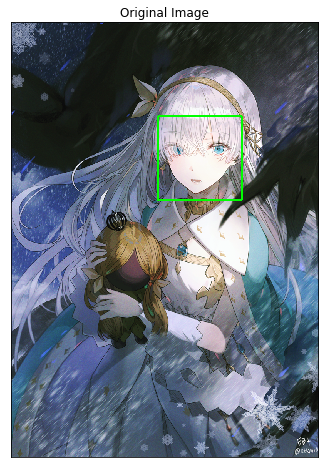

In [17]:
# Sample data preparation 
# using Animeface {@https://github.com/nya3jp/python-animeface}

image = PIL.Image.open(image_folder_path + '/000005.png')
faces = af.detect(image)

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for face in faces:
    fp = face.face.pos
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (fp.x,fp.y), (fp.x+fp.width,fp.y+fp.height), (0,255,0), 3)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Detected Image')
ax1.imshow(image_with_detections)

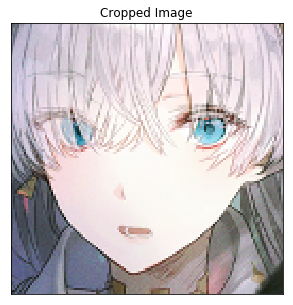

In [32]:
# Make a copy of the orginal image to draw face detections on
image_cp = np.copy(image)

# Get the bounding box for each detected face
for face in faces:
    fp = face.face.pos
    
    # Crop the face from the gray scale image
    face_cropped = image_cp[fp.y: fp.y + fp.height, fp.x: fp.x + fp.width]
    
    # Resize the image to match 128 x 128 input
    face_resized = cv2.resize(face_cropped, (128,128), interpolation = cv2.INTER_CUBIC)
    
    # Plot our image using subplots to specify a size and title
    fig = plt.figure(figsize = (5,5))
    ax1 = fig.add_subplot(111)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax1.set_title('Cropped Image')
    ax1.imshow(face_resized)
    
    # Store the resized image
    face_resized = PIL.Image.fromarray(face_resized)
    face_resized.save(image_folder_path + '/test_001.jpg')


## Data processing

In [48]:
# Start to process all the images. Following are the steps:
#   1. Detect anime faces
#   2. Crop and resize the detected faces
#   3. Save the new image
#   4. Delete the original image
image_type = [".jpg", ".png"]

if(os.path.isdir(image_folder_path)):
    image_list = []
    image_index = 1
    count = 0
    
    # Retrive all items from the folder
    for type in image_type:
        image_list.extend(glob.glob(image_folder_path + "/*" + type))
    
    # Start to process the images
    for image_path in image_list:
        print('Processing image ' + image_path[-10:])
        
        try:
            # Load the image
            image = PIL.Image.open(image_path)
            # Detect anime faces
            faces = af.detect(image)
            # Make a copy of the orginal image to draw face detections on
            image_cp = np.copy(image)

            for face_model in faces:
                # Retrieve the bonding box positions
                fp = face_model.face.pos
                # Crop the face
                face_cropped = image_cp[fp.y: fp.y + fp.height, fp.x: fp.x + fp.width]
                # Resize the image to match 128 x 128 input
                face_resized = cv2.resize(face_cropped, (128,128), interpolation = cv2.INTER_CUBIC)
                # Store the resized image
                face_resized = PIL.Image.fromarray(face_resized)
                face_resized.save(image_folder_path + '/img_' + str(image_index) + image_path[-4:])
                # Increase the index
                image_index += 1
         
            # Delete the original image
            os.remove(image_path)
        except (IOError, OSError, ValueError):  ## if failed, report it back to the user ##
            try:
                # Delete the original image
                os.remove(image_path)
            except OSError:
                pass
            pass

Processing image 000608.jpg
Processing image 000634.jpg
Processing image 000152.jpg
Processing image 000146.jpg
Processing image 000620.jpg
Processing image 000807.jpg
Processing image 000191.jpg
Processing image 000350.jpg
Processing image 000436.jpg
Processing image 000393.jpg
Processing image 000218.jpg
Processing image 000224.jpg
Processing image 000542.jpg
Processing image 000556.jpg
Processing image 000581.jpg
Processing image 000768.jpg
Processing image 000026.jpg
Processing image 000032.jpg
Processing image 000754.jpg
Processing image 000967.jpg
Processing image 000783.jpg
Processing image 000797.jpg
Processing image 000972.jpg
Processing image 000966.jpg
Processing image 000755.jpg
Processing image 000741.jpg
Processing image 000769.jpg
Processing image 000594.jpg
Processing image 000580.jpg
Processing image 000557.jpg
Processing image 000231.jpg
Processing image 000225.jpg
Processing image 000219.jpg
Processing image 000386.jpg
Processing image 000392.jpg
Processing image 000

Processing image 000127.jpg
Processing image 000641.jpg
Processing image 000899.jpg
Processing image 000669.jpg
Processing image 000645.jpg
Processing image 000123.jpg
Processing image 000889.jpg
Processing image 000651.jpg
Processing image 000679.jpg
Processing image 000686.jpg
Processing image 000692.jpg
Processing image 000876.jpg
Processing image 000321.jpg
Processing image 000447.jpg
Processing image 000453.jpg
Processing image 000335.jpg
Processing image 000309.jpg
Processing image 000484.jpg
Processing image 000490.jpg
Processing image 000255.jpg
Processing image 000533.jpg
Processing image 000527.jpg
Processing image 000241.jpg
Processing image 000296.jpg
Processing image 000731.jpg
Processing image 000057.jpg
Processing image 000725.jpg
Processing image 000094.jpg
Processing image 000080.jpg
Processing image 000902.jpg
Processing image 000903.jpg
Processing image 000917.jpg
Processing image 000081.jpg
Processing image 000095.jpg
Processing image 000718.jpg
Processing image 000

Processing image 000985.jpg
Processing image 000749.jpg
Processing image 000761.jpg
Processing image 000013.jpg
Processing image 000775.jpg
Processing image 000952.jpg
Processing image 000953.jpg
Processing image 000012.jpg
Processing image 000774.jpg
Processing image 000990.jpg
Processing image 000748.jpg
Processing image 000984.jpg
Processing image 000589.jpg
Processing image 000576.jpg
Processing image 000204.jpg
Processing image 000238.jpg
Processing image 000402.jpg
Processing image 000416.jpg
Processing image 000358.jpg
Processing image 000833.jpg
Processing image 000166.jpg
Processing image 000600.jpg
Processing image 000614.jpg
Processing image 000172.jpg
Processing image 000628.jpg
Processing image 000158.jpg
Processing image 000602.jpg
Processing image 000164.jpg
Processing image 000170.jpg
Processing image 000616.jpg
Processing image 000825.jpg
Processing image 000831.jpg
Processing image 000819.jpg
Processing image 000400.jpg
Processing image 000414.jpg
Processing image 000

/Users/zhuoli/anaconda/envs/DL-projects/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Processing image 000479.png
Processing image 000323.png
Processing image 000492.png
Processing image 000460.png
Processing image 000689.png
Processing image 000058.png
Processing image 000716.png
Processing image 000064.png
Processing image 000528.png
Processing image 000500.png
Processing image 000298.png
Processing image 000065.png
Processing image 000059.png
Processing image 000105.png
Processing image 000893.png
Processing image 000852.png
Processing image 000885.png
Processing image 000926.png
Processing image 000715.png
Processing image 000517.png
Processing image 000502.png
Processing image 000258.png
Processing image 000714.png
Processing image 000728.png
Processing image 000099.png
Processing image 000106.png
Processing image 000112.png
Processing image 000884.png
Processing image 000890.png
Processing image 000304.png
Processing image 000472.png
Processing image 000300.png
Processing image 000328.png
Processing image 000116.png
Processing image 000102.png
Processing image 000